# Data Understanding & Preparation 

In this project we will work with and analyze three different datasets: 
- the first dataset, called _Incidents.csv_ , contains information regarding accidents caused by guns in the United States. There are 28 columns in the dataset, which will be described in detail in the report.
- the second dataset, called _PovertyByStateYear.csv_ contains information about the percentage of poverty in each U.S. state in relation to the current year of the data. The dataset contains the following three columns: state, year, povertyPercentage.
- The third and final dataset, called _YearStateDistrictHouse.csv_ , contains information about the winner of the
congressional elections in the USA, for each year, state and congressional district. In total, the dataset contains 6 columns, with the following information: year, state, congressionalDistrict, party, candidateVotes, totalVotes.

The central component of the data science toolkit is **Pandas library**, and it is used in conjunction with other libraries in that collection. Pandas is built on top of the **NumPy package**, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in Scikit-learn.

In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats import pearsonr

## Loading the data set

In these lines we read the .csv files that contain the data. This data will be assigned to Pandas dataframe, that we called **incidents**, **poverty** and **district** respectively. After that we give some prints to give us a first visual idea of how the data is represented. 

In [2]:
incidents = pd.read_csv('Data/incidents.csv')
poverty = pd.read_csv('Data/povertyByStateYear.csv') 
district=pd.read_csv('Data/year_state_district_house.csv')

#To display all columns
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

/var/folders/d9/v13wwg9j4639cjvzqgvrv89r0000gn/T/ipykernel_44752/317296430.py:1: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  incidents = pd.read_csv('Data/incidents.csv')


In [3]:
print("Incidents dataset:")
incidents.head() #print the first 5 rows of incidents dataframe

Incidents dataset:


,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,participant_age_group1,participant_gender1,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
0,2015-05-02,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,94.0,33.0,19.0,Adult 18+,Male,19.0,19.0,19.0,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,Teen wounded while walking - Security guard at...,Shot - Wounded/Injured,NaN
1,2017-04-03,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,NaN,NaN,62.0,Adult 18+,Male,62.0,62.0,62.0,0.0,0.0,1.0,1.0,0.0,1,0,0.0,0.0,1.0,shot self after accident,"Shot - Dead (murder, accidental, suicide)",Suicide^
2,2016-11-05,Michigan,Detroit,6200 Block of East McNichols Road,42.4190,-83.0393,14.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.0,1.0,2.0,1 inj.,Shot - Wounded/Injured,NaN
3,2016-10-15,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,NaN,NaN,NaN,Adult 18+,Male,248339,707477,761203,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,2.0,NaN,Shot - Wounded/Injured,NaN
4,2030-06-14,Pennsylvania,Pittsburgh,California and Marshall Avenues,40.4621,-80.0308,14.0,NaN,NaN,NaN,Adult 18+,Male,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0,1,0.0,1.0,2.0,NaN,Shot - Wounded/Injured,"Drive-by (car to street, car to car)"


In [4]:
print("Poverty by state dataset:")
poverty.tail() #print the last 5 rows of poverty dataframe

Poverty by state dataset:


,state,year,povertyPercentage
879,Virginia,2004,9.1
880,Washington,2004,9.8
881,West Virginia,2004,15.0
882,Wisconsin,2004,10.9
883,Wyoming,2004,10.2


In [5]:
print("Year state district house dataset:")
district.tail() #print the last 5 rows of district dataframe

Year state district house dataset:


,year,state,congressional_district,party,candidatevotes,totalvotes
10436,2022,WISCONSIN,5,REPUBLICAN,243741,378523
10437,2022,WISCONSIN,6,REPUBLICAN,239231,251999
10438,2022,WISCONSIN,7,REPUBLICAN,209224,338268
10439,2022,WISCONSIN,8,REPUBLICAN,223981,310196
10440,2022,WYOMING,0,REPUBLICAN,132206,198198


At this point we can print the column labels of each datasets.

In [6]:
print(incidents.columns)
print()
print(poverty.columns)
print()
print(district.columns)

Index(['date', 'state', 'city_or_county', 'address', 'latitude', 'longitude',
       'congressional_district', 'state_house_district',
       'state_senate_district', 'participant_age1', 'participant_age_group1',
       'participant_gender1', 'min_age_participants', 'avg_age_participants',
       'max_age_participants', 'n_participants_child', 'n_participants_teen',
       'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured',
       'n_arrested', 'n_unharmed', 'n_participants', 'notes',
       'incident_characteristics1', 'incident_characteristics2'],
      dtype='object')

Index(['state', 'year', 'povertyPercentage'], dtype='object')

Index(['year', 'state', 'congressional_district', 'party', 'candidatevotes',
       'totalvotes'],
      dtype='object')


## Types of Attributes and basic checks

In this section we check the integrity of the data, that is, whether there are empty cells or corrupted data. 
For this purpose we will use the Pandas function **info()**, which checks if there are null values in any column. This function also checks the data type for each column, as well as the number of data types and the number of columns and rows.

In [7]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

In [8]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


In [9]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.6+ KB



Instead, in these rows we print the data types in each column of the three data sets.

In [10]:
print("Print the data types of each column of Incidents dataset:")
incidents.dtypes

Print the data types of each column of Incidents dataset:


date                          object
state                         object
city_or_county                object
address                       object
latitude                     float64
longitude                    float64
congressional_district       float64
state_house_district         float64
state_senate_district        float64
participant_age1             float64
participant_age_group1        object
participant_gender1           object
min_age_participants          object
avg_age_participants          object
max_age_participants          object
n_participants_child          object
n_participants_teen           object
n_participants_adult          object
n_males                      float64
n_females                    float64
n_killed                       int64
n_injured                      int64
n_arrested                   float64
n_unharmed                   float64
n_participants               float64
notes                         object
incident_characteristics1     object
i

In [11]:
print("Print the data types of each column of PovertyByStateYear dataset:")
poverty.dtypes

Print the data types of each column of PovertyByStateYear dataset:


state                 object
year                   int64
povertyPercentage    float64
dtype: object

In [12]:
print("Print the data types of each column of YearStateDisctrictHouse dataset:")
district.dtypes

Print the data types of each column of YearStateDisctrictHouse dataset:


year                       int64
state                     object
congressional_district     int64
party                     object
candidatevotes             int64
totalvotes                 int64
dtype: object

In the next few lines we create a vector containing the count of null values for each column in our datasets, using the **isnull()** method in combination with the **sum()** method found in the Pandas library.

In [13]:
incidents_null=incidents.isnull().sum()
print(incidents_null)

date                             0
state                            0
city_or_county                   0
address                      16497
latitude                      7923
longitude                     7923
congressional_district       11944
state_house_district         38772
state_senate_district        32335
participant_age1             92298
participant_age_group1       42119
participant_gender1          36362
min_age_participants         74798
avg_age_participants         74620
max_age_participants         74708
n_participants_child         42104
n_participants_teen          42099
n_participants_adult         42102
n_males                      36362
n_females                    36362
n_killed                         0
n_injured                        0
n_arrested                   27626
n_unharmed                   27626
n_participants                   0
notes                        81017
incident_characteristics1      326
incident_characteristics2    97746
dtype: int64


In [14]:
poverty_null=poverty.isnull().sum()
print(poverty_null)

state                 0
year                  0
povertyPercentage    52
dtype: int64


At this point we move on to update the poverty DataFrame by removing the 52 rows containing null values in the column index corresponding to the *PovertyPercentage*. In fact, these rows turn out to be useless for the purpose of data analysis, since they only report state and year values. We therefore obtain a new table with no null values, as can be seen from the second check.

In [15]:
poverty=poverty.dropna()
poverty_null=poverty.isnull().sum()
print(poverty_null)

state                0
year                 0
povertyPercentage    0
dtype: int64


In [16]:
district_null=district.isnull().sum()
print(district_null)

year                      0
state                     0
congressional_district    0
party                     0
candidatevotes            0
totalvotes                0
dtype: int64


# Data Cleaning

In this macro section we deal with the key steps of data cleaning. Some small things have already been done previously during data understading - for example, the elimination of the 52 unnecessary rows in the poverty dataframe - but as we will see, the bulk of the calculation will be done here.

## Eliminate duplicates

In the next lines of code we will count for each dataset how many duplicates there are: that is, how many rows are the same as other rows already in the dataset. After this we will move on to modify the tables in each dataset by eliminating the duplicate rows - we keep the first instance of each row. In this way we get tables of smaller size in which each data item appears only once.

In [17]:
incidents_duplicated_rows=incidents.duplicated()
print("The total number of duplicate rows in the Incidents dataset is", incidents_duplicated_rows.sum())
# incidents[incidents_duplicated_rows]
incidents=incidents.drop_duplicates()


The total number of duplicate rows in the Incidents dataset is 253


We can then see that the number of duplicate rows in the Incidents dataset was 253. Of these rows we removed the duplicates using the pandas **drop_duplicates()** command. In the other two datesets, however, there were no duplicate rows, as we can see below.

In [18]:
print("The total number of duplicate rows in the Poverty By State Year dataset is", poverty.duplicated().sum())
print("The total number of duplicate rows in the Year State Disctrict House dataset is", district.duplicated().sum())


The total number of duplicate rows in the Poverty By State Year dataset is 0
The total number of duplicate rows in the Year State Disctrict House dataset is 0


## Modify data with object type 

At this point, after understanding how the datasets are formed, and have removed the duplicates, we will want to eliminate the object types in the datasets which we had seen using the **.info()** command. We can then move on to invert the object data into other types known from the pandas library. Let us leave aside for a moment the first column *date*, which we will move on to edit in a moment. Let us turn instead to transform object - and nonobject - data that should be expressed via a number into data of type numeric - i.e., either int or float. To do this we define a list of columns that should be numeric type data, and apply the **.to_numeric** command to each of them. We use also the feature *errors=* **coerce** to indicate that in the case of data where the algorithm fails to pass the data from object to numeric, then it transforms it into a null data. 

We count also how many data become null - and were not before - during the transformation process for each column. We can see that some columns, especially *min_age_participants*, *avg_age_participants* and *max_age_participants*, have a lot of data that become null during the process. This indicates that these columns were particularly *"dirty "*, that is, they had data inside that was not inherent to the columns (and in fact we contained a lot of strings, compared to the numbers we expected to have).

In [19]:
#define a list of columns to be processed for incidents
columns_to_numeric_incidents = [  'min_age_participants', 'avg_age_participants', 'max_age_participants', 
                        'n_participants_child', 'n_participants_teen', 'n_participants_adult',
                        'participant_age1', 'n_males', 'n_females', 'n_killed', 'n_injured',
                        'n_arrested', 'n_unharmed', 'n_participants', 'congressional_district', 
                        'state_house_district', 'state_senate_district', 'latitude', 'longitude'] 

print("Print how many data we cancelled in the process of transforming from object data to numeric data in incidents dataframe:")
for columns in columns_to_numeric_incidents:
    nan_before = incidents[columns].isna().sum()
    incidents[columns] = pd.to_numeric(incidents[columns], errors='coerce')
    nan_after = incidents[columns].isna().sum()
    print(f"{columns} : {nan_after - nan_before}")

#check that the types in each column we have changed are of type numeric
print("\n")
incidents[columns_to_numeric_incidents].info()

Print how many data we cancelled in the process of transforming from object data to numeric data in incidents dataframe:
min_age_participants : 5753
avg_age_participants : 5889
max_age_participants : 5885
n_participants_child : 5
n_participants_teen : 7
n_participants_adult : 3
participant_age1 : 0
n_males : 0
n_females : 0
n_killed : 0
n_injured : 0
n_arrested : 0
n_unharmed : 0
n_participants : 0
congressional_district : 0
state_house_district : 0
state_senate_district : 0
latitude : 0
longitude : 0


<class 'pandas.core.frame.DataFrame'>
Index: 239424 entries, 0 to 239676
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   min_age_participants    159123 non-null  float64
 1   avg_age_participants    159165 non-null  float64
 2   max_age_participants    159081 non-null  float64
 3   n_participants_child    197561 non-null  float64
 4   n_participants_teen     197564 non-null  float64
 5   n_

In [20]:
#define a list of columns to be processed for poverty
columns_to_numeric_poverty = ['povertyPercentage', 'year'] 

print("Print how many data we cancelled in the process of transforming from object data to numeric data in PovertyByStateYear dataframe:")
for columns in columns_to_numeric_poverty:
    nan_before = poverty[columns].isna().sum()
    poverty[columns] = pd.to_numeric(poverty[columns], errors='coerce')
    nan_after = poverty[columns].isna().sum()
    print(f"{columns} : {nan_after - nan_before}")

#check that the types in each column we have changed are of type numeric
print("\n")
poverty[columns_to_numeric_poverty].info()

Print how many data we cancelled in the process of transforming from object data to numeric data in PovertyByStateYear dataframe:
povertyPercentage : 0
year : 0


<class 'pandas.core.frame.DataFrame'>
Index: 832 entries, 0 to 883
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   povertyPercentage  832 non-null    float64
 1   year               832 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 19.5 KB


In [21]:
#define a list of columns to be processed for district
columns_to_numeric_district = [ 'candidatevotes', 'totalvotes', 'congressional_district', 'year'] 

print("Print how many data we cancelled in the process of transforming from object data to numeric data in District dataframe:")
for columns in columns_to_numeric_district:
    nan_before = district[columns].isna().sum()
    district[columns] = pd.to_numeric(district[columns], errors='coerce')
    nan_after = district[columns].isna().sum()
    print(f"{columns} : {nan_after - nan_before}")

#check that the types in each column we have changed are of type numeric
print("\n")
district[columns_to_numeric_district].info()

Print how many data we cancelled in the process of transforming from object data to numeric data in District dataframe:
candidatevotes : 0
totalvotes : 0
congressional_district : 0
year : 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   candidatevotes          10441 non-null  int64
 1   totalvotes              10441 non-null  int64
 2   congressional_district  10441 non-null  int64
 3   year                    10441 non-null  int64
dtypes: int64(4)
memory usage: 326.4 KB


At this point we would be missing to change the columns with object type data that present text strings within them, for example the column *state*. Actually these columns could safely remain as they are, but we will still use a method that will transform the data in these columns into numeric type data, so that we can calculate correlation on them as well. To do this, however, we will wait until we merge the datesets into a single dataset. Further down in the notebook you will then find this work, and we will explain well there the method we will use to do this. 

At the end let's remove unnecessary whitespace in the object type columns using the **.strip()** command for each dataset.

In [22]:
incidents = incidents.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
poverty = poverty.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
district = district.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

## Dropping useless attributes

During a data analysis of a dataframe it may be necessary to streamline the dataset by eliminating columns that are useless to our analysis or are not significant. In fact, even within our dataframes there are columns with irrelevant or unimportant information. The first four columns we will eliminate - all present in the incidents dataset - therefore are as follows:
- *participant_age1*, *participant_age_group1*, *participant_gender1*: these three columns have in common that they have randomly inserted data within them. We do not consider these data to be significant. In fact, in a data analysis we consider data concerning, for example, the gender of all participants in an incidents much more interesting than data concerning the gender of a random participant.
- *notes*: this column, on the other hand, with a lot of rows with null values inside, we remove it since the types of information are not consistent with the rest of the dataset. In fact sometimes it presents as data a description of the incident, sometimes a summary of what is already expressed by the remaining columns, in a very subjective way. We therefore feel that we cannot treat this column by generalizing it to extract useful information.

However, during the course of the analysis we may decide to eliminate other columns. For now, these four are the ones that seemed immediately uninteresting to our work. We may, however, as we continue to study the dataset, notice other columns that are not relevant to our analysis.

In [23]:
incidents = incidents.drop('participant_age1', axis='columns')
incidents = incidents.drop('participant_age_group1', axis='columns')
incidents = incidents.drop('participant_gender1', axis='columns')
incidents = incidents.drop('notes', axis='columns')

## Rounding Values in Numeric Columns

Previously, with the **to_numeric()** function, we converted most of the columns to the float type, as this will be useful later when we go to calculate correlations and when we go to replace NaN values with the mean or median in some columns - see below.

In these next few rows, however, we are concerned with handling those columns with float data that should be integer data, however. So let us take a list of columns that should handle data of integer type - for example, *min_age_participants* clearly having to describe an age, it is expected to have an integer - and let us round all the data in these columns with the **.round()** command. This step is done to make sure that we don't have decimal numbers within columns where integer numbers are expected. It must be said that no such data should appear in this specific dataset, but it still seems right to do this operation. 

In [24]:
# These are the attributes that shouldn't have non integer values
columns_to_round = ['min_age_participants', 'max_age_participants', 
                    'n_participants_child', 'n_participants_teen', 'n_participants_adult',
                    'n_males', 'n_females', 'n_killed', 'n_injured',
                    'n_arrested', 'n_unharmed', 'n_participants', 'congressional_district',
                    'state_house_district', 'state_senate_district']

incidents[columns_to_round] = incidents[columns_to_round].round()

## Data Cleaning by column

In this part - the largest part of data cleaning - we are going to take each column of the three dataframes and analyze it, trying to find possible outliers or errors and eliminate them. 

### Incidents - Date

The first thing we check is that the **dates** in the column *date* in the incidents dataframe are consistent with the dataset and well defined  - there should not be a date indicating May 41 for example. As a first step, we then take the column with the dates and save them in a separate variable in string type data, using the **.astype(str)** command. This way we can split the data inherent to years, months and days using the **.split()** command. 

Once this is done we move on to print the maximum and minimum numbers that appear in the data inherent in years, months and days. We notice how months and days take acceptable values: months take values between 1 and 12 and days between 1 and 31, as they should. For years, however, we see that the maximum value is 2030, which is wrong since it is a future date.

In [25]:
#divide the dates into separate parts
date_parts = incidents["date"].str.split('-')

#extract the maximum from the year, month and day
year_max = date_parts.str[0].max()
month_max = date_parts.str[1].max()
day_max = date_parts.str[2].max()

#extract the minimum from the year, month and day
year_min = date_parts.str[0].min()
month_min = date_parts.str[1].min()
day_min = date_parts.str[2].min()

print(f"Max year: {year_max}")
print(f"Max month: {month_max}")
print(f"Max day: {day_max}")

print(f"Min year: {year_min}")
print(f"Min month: {month_min}")
print(f"Min day: {day_min}")

Max year: 2030
Max month: 12
Max day: 31
Min year: 2013
Min month: 01
Min day: 01


As we can actually see, the years in the dataframe take values that vary between 2013 and 2030. In particular, all the years from 2013 to 2018 are present, after which there is a ten-year jump and we have the years 2028, 2029, and 2030. Since these three years are clearly wrong, we can assume - and we'd better do so, otherwise the whole dataset would have to be questioned - that the mistake consists only in the bad inclusion of a single digit, specifically the third one - that of the tens digit. In fact, since the data inherent in days and months are not wrong either, it seems reasonable to think that the error is only in that one digit without having to delete all these data.

In [26]:
date_incidents=date_parts.str[0].unique()
date_incidents.sort()
print("We print all the year that appear in the column date in the incidents dataframe:")
print(date_incidents)

We print all the year that appear in the column date in the incidents dataframe:
['2013' '2014' '2015' '2016' '2017' '2018' '2028' '2029' '2030']


So the idea now is to change the tens digit for the wrong years. This could be replaced in two main ways. In fact, we could make it become 2028 or 2018 or 2008. Same for 2029 and 2030. The latter could also take on an extra value, in fact it could become 2000, 2010 or 2020. We therefore make two observations:

- It would make sense to give a sense of continuity to the dataset. Assuming 2028=2008, 2029=2019, 2030=2000 is possible, but it does not seem logical seeing the other years in the dataset that are homogeneously distributed among the years from 2013 to 2018 - and thus consecutive years. Considering this, the most logical choice would be to have this consecutive streak continue and assume 2028=2018, 2029=2019, 2030=2020.

- The other datasets have data that vary between different years, all of which go up to 2020. It would make sense to think that the first dataset also contains data going up to that year. The most logical choice remains the one above.

Given the considerations above, let us change the data by transforming the years as follows: 2028=2018, 2029=2019, and 2030=2020.

In [27]:
incidents['date'] = incidents['date'].str.replace(r'2028-', '2018-')
incidents['date'] = incidents['date'].str.replace(r'2029-', '2019-')
incidents['date'] = incidents['date'].str.replace(r'2030-', '2020-')

Let us now pick up for a moment what was left undone in the previous section. After completing this operation and making sure that the *date* column in the incident dataframe is clean, we can in fact move on to transform its data from object type to datetime type. The datetime type is present in the pandas libraries precisely to handle dates. We then use the **.to_datetime** command, where we again insert the *errors=* **coerce** feature to indicate that in the case of data where the algorithm fails to pass the data from object to datetime, then it transforms it to a null data. Finally, we count how many pieces of data became null - and which were not null before - during the object-to-datetime transformation process.

In [28]:
nan_before=incidents['date'].isna().sum()
incidents['date'] = pd.to_datetime(incidents['date'], errors='coerce')
nan_after=incidents['date'].isna().sum()
print("Print how many data we cancelled in the process of transforming from object data to datetime data:")
print("date :", nan_after - nan_before)
incidents["date"].info()

Print how many data we cancelled in the process of transforming from object data to datetime data:
date : 0
<class 'pandas.core.series.Series'>
Index: 239424 entries, 0 to 239676
Series name: date
Non-Null Count   Dtype         
--------------   -----         
239424 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.7 MB


To conclude the *dates* column and show that the data are completely clean we print a graph showing for each month which days and how many days there are. We do this just to show that for months that possess fewer days are met - for example, that there is no February 30 or April 31.

Number of unique days for each month:
month
1     31
2     29
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    31
11    30
12    31
Name: day, dtype: int64


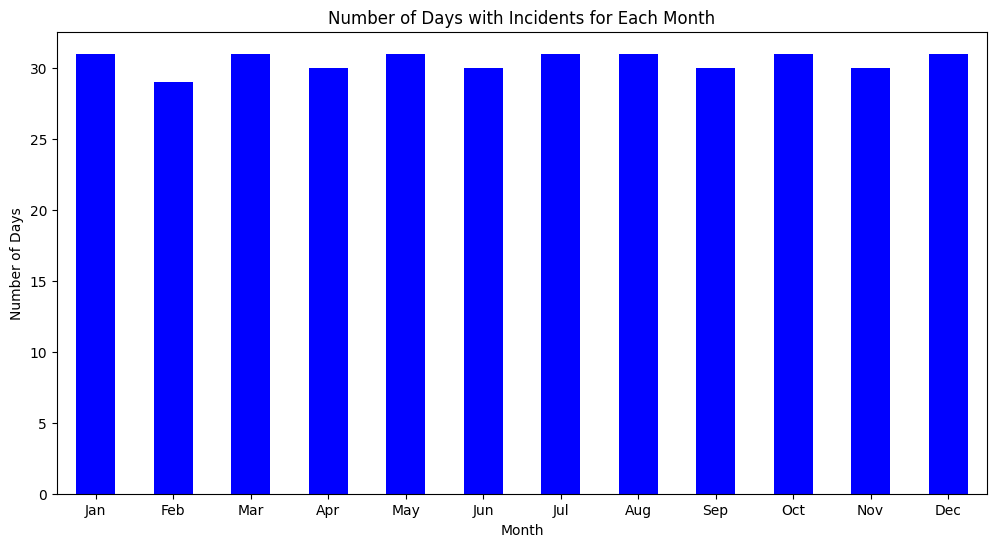

In [29]:
# Extract months and days from the dates
incidents['month'] = incidents['date'].dt.month
incidents['day'] = incidents['date'].dt.day

# Find the number of unique days for each month
days_per_month = incidents.groupby('month')['day'].nunique()

# Print the number of unique days for each month
print("Number of unique days for each month:")
print(days_per_month)

# Create a bar chart
plt.figure(figsize=(12, 6))
days_per_month.plot(kind='bar', color='blue')
plt.title('Number of Days with Incidents for Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Days')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()


### Poverty and district - year

This column presents the years in which data are collected. Our analysis on this column will then be trivially to check that the dates entered are well-defined, consecutive, and how many are not NaN. We therefore begin by checking these things.

In [30]:
print("NaN values in poverty dataframe", poverty['year'].isna().sum())
print("NaN values in district dataframe", district['year'].isna().sum())
print() 

unique_years_poverty = poverty['year'].unique()
unique_years_poverty.sort()
print(unique_years_poverty)

unique_years_district = district['year'].unique()
unique_years_district.sort()
print(unique_years_district)

NaN values in poverty dataframe 0
NaN values in district dataframe 0

[2004 2005 2006 2007 2008 2009 2010 2011 2013 2014 2015 2016 2017 2018
 2019 2020]
[1976 1978 1980 1982 1984 1986 1988 1990 1992 1994 1996 1998 2000 2002
 2004 2006 2008 2010 2012 2014 2016 2018 2020 2022]


We see how indeed no null values are present in these columns. We also see how the values of the years in the poverty dataframe are well defined and consecutive, as they range from 2004 to 2020. In contrast, as far as the district dataframe is concerned, the values are well-defined and in their own way they are also consecutive. In fact they take into account the values from 1976 to 2022, but skipping the odd-numbered years. This is simply because these are the years in which congressional elections take place in the united states, so it is only fair that the values go from year to year.

### Incidents, poverty and district - State
Let us now check the column of states in the incidents dataframe. In this case, since it is a finite data type - there are 50 federal states in the united states, to which small exceptions are added as we shall see - we can move on to analyze this column in a simple way, printing out the different types of instance. We check so that the U.S. federal states are all present. With the pandas **unique()** command we save all the different instances of states in the Incidents dataset into a list. So, as we can see with the following prints, all 50 federal states of the U.S. are then present, to which an instance is added for the *District of Columbia*, also known as Washington D.C. - the capital city.

In [31]:
column_states=incidents["state"].unique()
column_states.sort()
print("The number of different states in the incidents dataset is:", column_states.size)
print()
print("The states that appear in the state column of the incidents dataset are:")
print(column_states)

The number of different states in the incidents dataset is: 51

The states that appear in the state column of the incidents dataset are:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Now we do the same for the two remaining datasets: PovertyByStateYear and YearStateDistrictHouse. First we move to check in poverty dataframe.

In [32]:
column_states=poverty["state"].unique()
column_states.sort()
print("The number of different states in the poverty dataset is:", column_states.size)
print()
print("The states that appear in the state column of the poverty dataset are:")
print(column_states)

The number of different states in the poverty dataset is: 52

The states that appear in the state column of the poverty dataset are:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'United States' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


As we can see in the poverty dataframe there are 52 types of states present. Unlike before, in fact the United States instance is added. In this case we print how many times each data istances appears in the table to see that United States is not a typo. But in fact it is printed exactly the same number of times as the other data. So again the printing of the datum is intentional, and we leave it in the table.

Achtung: This implies that when we join the tables, there may be 16 rows where most of the data will be empty. These would be the occurrences where United States appears in the *state* column, and in those rows we will have only the information inherent in the poverty table. That is why when we join the tables we will decide not to consider the occurrences of United States at all - just join the tables following the *state* occurrences in the incidents table.

In [33]:
poverty["state"].value_counts()

state
United States           16
Alabama                 16
Nebraska                16
Nevada                  16
New Hampshire           16
New Jersey              16
New Mexico              16
New York                16
North Carolina          16
North Dakota            16
Ohio                    16
Oklahoma                16
Oregon                  16
Pennsylvania            16
Rhode Island            16
South Carolina          16
South Dakota            16
Tennessee               16
Texas                   16
Utah                    16
Vermont                 16
Virginia                16
Washington              16
West Virginia           16
Wisconsin               16
Montana                 16
Missouri                16
Mississippi             16
Hawaii                  16
Alaska                  16
Arizona                 16
Arkansas                16
California              16
Colorado                16
Connecticut             16
Delaware                16
District of Columbia  

Finally we do the same with the district dataframe. In this case we again have 51 different states, the same as in the incidents and poverty dataframes - to which United States is added. These are actually transcribed in block letters, not in lower case as in the other cases, but this will not be a problem: when we do the join of the tables the algorithm will recognize that two equal states are the same even if one is written in lower case and one in block letters.

In [34]:
column_states=district["state"].unique()
column_states.sort()
print("The number of different states in the district dataset is:", column_states.size)
print()
print("The states that appear in the state column of the district dataset are:")
print(column_states)

The number of different states in the district dataset is: 51

The states that appear in the state column of the district dataset are:
['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND' 'SOUTH CAROLINA'
 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING']


### Incidents - city_or_county, address

These two values are peculiar in that it is very difficult to tell whether they are correct or not, and one column - the address column - is closely related to the other. 

However, let us start by talking about the *address* column. First we print out how many addresses appear once in the dataset. As we can see these are a lot: about 185 thousand, so more than two-thirds of the dataset. After that we go on to print the first 10 values of the **value_counts()** function. As we can still see even these addresses have a small number of appearances in the dataset, despite the fact that they are the ones that appear the most times. So in effect *address* is a column with very sparse values. 

Moreover, this column must be closely related to the information given by the *city_or_county* column, since knowing that the crime occurs solely on Main Street, for example, does not help us understand its exact location. In fact in power every American city could have a street with this name. So our idea behind these considerations might have been to eliminate the column. But we decide to keep it as it could be useful for doing some kinds of analysis, for example to see which area of a specific city is more dangerous. To motivate our choice again, it is enough to see that below, in the first ten occurrences of **value_counts()**, the word Terminal appears in four instances and Main Street in two: even from these things we can glean information.

In [35]:
count=(incidents["address"].value_counts() == 1).sum()
print("We print the number of addresses that appear only once in the dataset:", count)
print()
print(incidents["address"].value_counts().head(10))

We print the number of addresses that appear only once in the dataset: 183541

address
2375 International Pkwy        148
Main Street                    139
6000 N Terminal Pkwy           131
3400 E Sky Harbor Blvd         121
8500 Peña Blvd                  91
2800 N Terminal Rd              80
6000 North Terminal Parkway     68
1 Jeff Fuqua Blvd               60
1 Terminal Dr                   58
North Main Street               55
Name: count, dtype: int64


We then do the same thing with the *city_or_county* column and notice that in this case the column has much less scattered values. Furthermore, each occurrence of a city indicates the number of incidents that happens in it, and thus gives us an additional piece of information, which we could call as *incidents_city*. We decide, however, not to include this column now in the dataset, but only at the end of the part of cleaning.

We would also like to point out the importance of the *city_or_county* column by saying that along with the *date* column and the *state* column are the only columns without null data initially in the incidents dataset. This makes us think that for whoever drew up the dataset this column was communally important, and so we expect that it is certainly cleaner and more reliable than the other columns.

In [36]:
count=(incidents["city_or_county"].value_counts() == 1).sum()
print("We print the number of addresses that appear only once in the dataset:", count)
print()
print(incidents["city_or_county"].value_counts().head(10))

We print the number of addresses that appear only once in the dataset: 4970

city_or_county
Chicago         10813
Baltimore        3922
Washington       3265
New Orleans      3083
Philadelphia     2962
Saint Louis      2494
Milwaukee        2487
Houston          2484
Jacksonville     2447
Memphis          2386
Name: count, dtype: int64


The last thing that could be done for the *city_or_county* column, to check that all the names actually refer to actually existing cities or counties, would be to download an external list with the names of cities and counties in the United States. In fact, we'll do something similar later, so we'll leave this task pending and come back to it later.

### Incidents and district - congressional_district

This column represents the congressional districts in which the incidents occur. Every federal state has at least one congressional district - most states have more than one - and the maximum number of congressional districts a federal state had in the time period considered in the dataset is 53, the number of congressional districts California had in 2020. So the first check we do on this column is all numbers are between 1 and 53. In fact, each number in this column is associated with the *state* column of the same row, so if we find in a row with state **X** and with congressional district **Y**, this means that the incident occurred in the **Y**th congressional district of state **X**. 

In [37]:
print(incidents['congressional_district'].min())
print(incidents['congressional_district'].max())

print(district['congressional_district'].min())
print(district['congressional_district'].max())

0.0
53.0
0
53


As we see, however, in both the incidents and district dataframes, we also have 0 as an occurrence of value in the *congressional_district* column. Let us therefore check what states this value is associated with.

In [38]:
district_0 = incidents[incidents['congressional_district'] == 0]['state'].unique()
print("The states associated with the value 0 of congressional district in the incidents dataframe are:", district_0)

district_0 = district[district['congressional_district'] == 0]['state'].unique()
print("The states associated with the value 0 of congressional district in the district dataframe are", district_0)

district_53 = incidents[incidents['congressional_district'] == 53]['state'].unique()
print("The states associated with the value 53 of congressional district in the incidents dataframe are:", district_53)

district_53 = district[district['congressional_district'] == 53]['state'].unique()
print("The states associated with the value 53 of congressional district in the incidents dataframe are:", district_53)

The states associated with the value 0 of congressional district in the incidents dataframe are: ['Montana' 'North Dakota' 'Delaware' 'Wyoming' 'South Dakota']
The states associated with the value 0 of congressional district in the district dataframe are ['ALASKA' 'DELAWARE' 'NEVADA' 'NORTH DAKOTA' 'VERMONT' 'WYOMING'
 'SOUTH DAKOTA' 'MONTANA' 'DISTRICT OF COLUMBIA']
The states associated with the value 53 of congressional district in the incidents dataframe are: ['California']
The states associated with the value 53 of congressional district in the incidents dataframe are: ['CALIFORNIA']


With a simple search you can see how all the states associated with 0 are actually states with a single congressional district. So it is not wrong to turn these values from 0 to 1 and thus correct the error. In addition we printed the states associated with the value 53, and as we can see in both dataframes the only state is indeed California. With a similar search we can see - we did but did not print - how in the same way the other congressional district numbers are correctly associated with the states. 

In [39]:
incidents['congressional_district'] = incidents['congressional_district'].replace(0, 1)
district['congressional_district'] = district['congressional_district'].replace(0, 1)


## Incidents - state_house_district, state_senate_district

These two columns should work similarly to the *congressional_district* column, but in fact as we see they have much worse values. Let us begin by saying that each state has a variable number of state house districts or state senate districts, which can exceed even hundreds in the case of large states like California and Texas. Let us then do an analysis of the data in the *state_house_district* column - for the *state_senate_district* column we omit it, but the result would have been very similar - and see how the values vary.

In [40]:
print(incidents['state_house_district'].min())
print(incidents['state_house_district'].max())

incidents["state_house_district"].value_counts()

1.0
901.0


state_house_district
18.0     3473
10.0     3409
32.0     3216
31.0     3191
3.0      3063
         ... 
901.0       1
727.0       1
726.0       1
622.0       1
811.0       1
Name: count, Length: 275, dtype: int64

As we can by initially printing the maximum, and then the **value_counts()**, there are many values that are too high, above 600, 700 and even 901. These values are clearly outliers. To try to see if there is any order in these values we print the states with which they are associated.

In [41]:
value_counts=incidents["state_house_district"].value_counts()
values_with_count_1 = value_counts[value_counts == 1].index
print(values_with_count_1)

for house_district in values_with_count_1:
    unique_states = incidents[incidents['state_house_district'] == house_district]['state'].unique()
    print(f"District {house_district}: {unique_states}")

Index([809.0, 210.0, 211.0, 618.0, 529.0, 709.0, 723.0, 615.0, 303.0, 717.0,
       614.0, 214.0, 804.0, 524.0, 808.0, 610.0, 411.0, 506.0, 714.0, 721.0,
       503.0, 601.0, 713.0, 623.0, 814.0, 813.0, 805.0, 720.0, 530.0, 605.0,
       183.0, 801.0, 901.0, 727.0, 726.0, 622.0, 811.0],
      dtype='float64', name='state_house_district')
District 809.0: ['New Hampshire']
District 210.0: ['Massachusetts']
District 211.0: ['Massachusetts']
District 618.0: ['New Hampshire']
District 529.0: ['New Hampshire']
District 709.0: ['New Hampshire']
District 723.0: ['New Hampshire']
District 615.0: ['New Hampshire']
District 303.0: ['New Hampshire']
District 717.0: ['New Hampshire']
District 614.0: ['New Hampshire']
District 214.0: ['Massachusetts']
District 804.0: ['New Hampshire']
District 524.0: ['New Hampshire']
District 808.0: ['New Hampshire']
District 610.0: ['New Hampshire']
District 411.0: ['New Hampshire']
District 506.0: ['New Hampshire']
District 714.0: ['New Hampshire']
District 721.0

As we can see in effect all the values that appear only once in the dataframe are associated with only two states: New Hampshire or Massachusetts. Actually this would also help us if we wanted to do inference and look for the true value of these data. Or anyway we could just treat them as outliers and make them NaN. But we actually find that these two columns are not really useful for our analysis. In fact, these are used to determine the geographic locations of an incident. But several other pieces of information already exist to do this, such as *state*, *city_or_county*, *latitude*, *longitude* or *congressional_district* - and they all seem to be filled with more reliable and meaningful data. In effect, these columns merely represent another way of looking at the districts of each federal state. But while congressional districts may be useful to us, even simply for joining the two dataframes incidents and districts, these two columns are - for us - less useful in view of future analyses. We therefore decide to delete them with the **drop** command.

In [42]:
incidents = incidents.drop(columns=['state_house_district'])
incidents = incidents.drop(columns=['state_senate_district'])

### Incidents - n_participants

This crucial column holds within it the information inherent in the number of participants of each incident reported in the incidents dataframe. The first type of work we do in this column is quite simple. 
 - First we enter a command that transforms all negative values in the column to NaN - no incident can have a negative number of participants.
 - Later we had done a whole analysis to find and eliminate any remaining outliers, but in doing so we found that the column itself is quite clean. 
 - In fact only one figure jumped out after our analysis to actually be significantly greater than the others. This one - which is 103 - we could actually turn it into NaN so that the column values would be more compact. But at the end we decided to leave it as we think it is a valid value on such a large dataset - it is not at all inconceivable to imagine an incident involving 103 people, especially in the US.
 
 So to show that the values are all in a certain range we print them with **value_counts()**. 

In [43]:
incidents["n_participants"].mask(incidents['n_participants'] < 0, inplace=True)
print(incidents['n_participants'].value_counts())

n_participants
1.0      104833
2.0       70649
0.0       24630
3.0       23489
4.0        9484
5.0        3726
6.0        1418
7.0         570
8.0         280
9.0         114
10.0         76
11.0         36
12.0         27
13.0         15
15.0         14
17.0          8
14.0          8
20.0          6
16.0          5
19.0          5
18.0          4
24.0          4
21.0          3
22.0          3
35.0          2
29.0          2
27.0          2
26.0          2
47.0          1
63.0          1
23.0          1
30.0          1
37.0          1
52.0          1
32.0          1
28.0          1
103.0         1
Name: count, dtype: int64


One last thing we want to do in this column is to pass all values where it is 0 in NaN. In fact, we believe that there should only be incidents with at least one participant in this dataframe, so having value of *n_participants* equal to 0 makes no sense.

In [44]:
print(incidents['n_participants'].isna().sum())
incidents['n_participants'].replace(0, np.nan, inplace=True)
print(incidents['n_participants'].isna().sum())

0
24630


Thus we can see how 24630 values have now become NaN - and before they were 0.

### Incidents - min_age_participants, avg_age_participants, max_age_participants

These three columns give us important information regarding the type of participants of the incidents reported in the incidents dataset. All values in these columns have already been previously cleaned of all nonnumeric values and have also been rounded. Let us now try to find any outliers in these columns. The first trivial idea that comes to us is to check the lower and upper bounds to make sure that all values are within an acceptable range. However, this does not happen as can be seen below.

In [45]:
print(incidents['min_age_participants'].min())
print(incidents['min_age_participants'].max())
print(incidents['avg_age_participants'].min())
print(incidents['avg_age_participants'].max())
print(incidents['max_age_participants'].min())
print(incidents['max_age_participants'].max())

-1000.0
900000000000.0
-1000.0
871916284.0
-1000.0
8300000.0


This indicates to us that there are indeed outliers in the three columns we are analyzing. To solve the problem we then go to give a command that allows us to transform all negative numbers into NaN - it is not possible for the average age or simply an age of a participant in an incident to be negative - and into NaN all numbers greater than 105, which we think is likely to be the maximum age we can expect to find - albeit with surprise. 

We decided to treat these columns this way for two reasons:
- Mainly we start with the assumption that data that are not clearly outliers are right. If we started to doubt the goodness of the data, even the verisimilarly right data, then all the analysis we had to do with these columns would be meaningless.
- Once we had done this reasoning then, we thought that in the case of ages it is fairly easy to decide what is a range of ages to be considered verisimilarly reliable - and that is the one written above, so (0, 105) - and then by contrast we considered all data not in that range as outliers. 

In [46]:
#define range for the ages
age_lower_limit = 0
age_upper_limit = 105

min_null=incidents["min_age_participants"].isnull().sum()
avg_null=incidents["avg_age_participants"].isnull().sum()
max_null=incidents["max_age_participants"].isnull().sum()

#masks values outside the limits specified in the age columns
incidents["min_age_participants"].mask((incidents['min_age_participants'] < age_lower_limit) | (incidents['min_age_participants'] > age_upper_limit), np.nan, inplace=True)
incidents["avg_age_participants"].mask((incidents['avg_age_participants'] < age_lower_limit) | (incidents['avg_age_participants'] > age_upper_limit), np.nan, inplace=True)
incidents["max_age_participants"].mask((incidents['max_age_participants'] < age_lower_limit) | (incidents['max_age_participants'] > age_upper_limit), np.nan, inplace=True)

print("The new values that became NaN in min_age_participants are:", incidents["min_age_participants"].isnull().sum() - min_null)
print("The new values that became NaN in avg_age_participants are:", incidents["avg_age_participants"].isnull().sum() - avg_null)
print("The new values that became NaN in max_age_participants are:", incidents["max_age_participants"].isnull().sum() - max_null)

print("Lower and upper limits have now become:")
print(incidents['min_age_participants'].min())
print(incidents['min_age_participants'].max())
print(incidents['avg_age_participants'].min())
print(incidents['avg_age_participants'].max())
print(incidents['max_age_participants'].min())
print(incidents['max_age_participants'].max())

The new values that became NaN in min_age_participants are: 11745
The new values that became NaN in avg_age_participants are: 11791
The new values that became NaN in max_age_participants are: 11706
Lower and upper limits have now become:
0.0
101.0
0.0
101.0
0.0
101.0


### Incidents - n_participants_child, n_participants_teen, n_participants_adult, n_male, n_female, n_killed, n_injured, n_unharmed

In this section we work simultaneously with 8 columns, in particular we work with three blocks which are those formed by:
- *n_participants_adult*, *n_participants_teen* and *n_participants_child*: here we have data related to the age of the people who participated in the incidents;
- *n_male* and *n_female*: here we have data related to the gender of the people who participated in the incidents;
- *n_killed*, *n_injured* and *n_unharmed*: here we have data related to the condition in which people came out of an accident.

We decide to put these three sets of columns together because they all have the characteristic of being disjoint union of the *n_participants* column, and therefore we are going to do equal work for all the columns. In the first part we do something similar to what we have done before, that is, we are going to eliminate the values that are inconsistent. Basically we are going to eliminate 
- all data that have negative numbers - the number of participants of each type cannot be negative; 
- all data that have numerical values greater than those reported in the *n_participants* column.

For this last point, in fact, we point out that since each set of the three is a disjoint union of the *n_participants* column - therefore,the sum of the values in each set should be equal to the value in *n_participants* - therefore, none of these columns can have a numerical value strictly greater than the values in the *n_participants* column.

In [47]:
print("Old min and max values for participants_child:")
print(incidents['n_participants_child'].min())
print(incidents['n_participants_child'].max())
print("Old min and max values for participants_teen:")
print(incidents['n_participants_teen'].min())
print(incidents['n_participants_teen'].max())
print("Old min and max values for participants_adult:")
print(incidents['n_participants_adult'].min())
print(incidents['n_participants_adult'].max())

incidents['n_participants_child'].mask(incidents['n_participants_child'] < 0, np.nan, inplace=True)
incidents['n_participants_teen'].mask(incidents['n_participants_teen'] < 0, np.nan, inplace=True)
incidents['n_participants_adult'].mask(incidents['n_participants_adult'] < 0, np.nan, inplace=True)

incidents['n_participants_child'].mask(incidents['n_participants_child'] > incidents['n_participants'], np.nan,  inplace=True)
incidents['n_participants_teen'].mask(incidents['n_participants_teen'] > incidents['n_participants'], np.nan, inplace=True)
incidents['n_participants_adult'].mask(incidents['n_participants_adult'] > incidents['n_participants'], np.nan, inplace=True)

print("New min and max values for participants_child:")
print(incidents['n_participants_child'].min())
print(incidents['n_participants_child'].max())
print("New min and max values for participants_teen:")
print(incidents['n_participants_teen'].min())
print(incidents['n_participants_teen'].max())
print("New min and max values for participants_adult:")
print(incidents['n_participants_adult'].min())
print(incidents['n_participants_adult'].max())

Old min and max values for participants_child:
-977.0
886365.0
Old min and max values for participants_teen:
-947.0
762487.0
Old min and max values for participants_adult:
-991.0
827900.0
New min and max values for participants_child:
0.0
11.0
New min and max values for participants_teen:
0.0
27.0
New min and max values for participants_adult:
0.0
103.0


In [48]:
print("Old min and max values for n_males:")
print(incidents['n_males'].min())
print(incidents['n_males'].max())
print("Old min and max values for n_females:")
print(incidents['n_females'].min())
print(incidents['n_females'].max())

incidents["n_males"].mask(incidents['n_males'] < 0, inplace=True)
incidents["n_females"].mask(incidents['n_females'] < 0, inplace=True)
incidents["n_males"].mask(incidents['n_males'] > incidents['n_participants'], inplace=True)
incidents["n_females"].mask(incidents['n_females'] > incidents['n_participants'], inplace=True)

print("New min and max values for n_males:")
print(incidents['n_males'].min())
print(incidents['n_males'].max())
print("New min and max values for n_females:")
print(incidents['n_females'].min())
print(incidents['n_females'].max())


Old min and max values for n_males:
0.0
61.0
Old min and max values for n_females:
0.0
23.0
New min and max values for n_males:
0.0
61.0
New min and max values for n_females:
0.0
23.0


In [49]:
print("Old min and max values for n_killed:")
print(incidents['n_killed'].min())
print(incidents['n_killed'].max())
print("Old min and max values for n_injured:")
print(incidents['n_injured'].min())
print(incidents['n_injured'].max())
print("Old min and max values for n_unharmed:")
print(incidents['n_unharmed'].min())
print(incidents['n_unharmed'].max())

incidents["n_killed"].mask(incidents['n_killed'] < 0, inplace=True)
incidents["n_injured"].mask(incidents['n_injured'] < 0, inplace=True)
incidents["n_unharmed"].mask(incidents['n_unharmed'] < 0, inplace=True)

incidents["n_killed"].mask(incidents['n_killed'] > incidents['n_participants'], inplace=True)
incidents["n_injured"].mask(incidents['n_injured'] > incidents['n_participants'], inplace=True)
incidents["n_unharmed"].mask(incidents['n_unharmed'] > incidents['n_participants'], inplace=True)

print("New min and max values for n_killed:")
print(incidents['n_killed'].min())
print(incidents['n_killed'].max())
print("New min and max values for n_injured:")
print(incidents['n_injured'].min())
print(incidents['n_injured'].max())
print("New min and max values for n_unharmed:")
print(incidents['n_unharmed'].min())
print(incidents['n_unharmed'].max())

Old min and max values for n_killed:
0
50
Old min and max values for n_injured:
0
53
Old min and max values for n_unharmed:
0.0
20.0
New min and max values for n_killed:
0
50
New min and max values for n_injured:
0
53
New min and max values for n_unharmed:
0.0
20.0


As we can see then, while the results in the set consisting of the *n_participants_adult*, *n_participants_teen* and *n_participants_child* columns change a lot after using the **mask()** function - so there were both negative values and values greater than *n_participants* - in the other two sets the values do not change at all, and so we expect them to have cleaner values. 

As we said, since the three sets are individually the disjoint union of the *n_participants* column, another thing we can do to check the consistency of the data is to take each row, sum the column entries of the sets, and see where they are equal to the *n_participants* entry. We then get three new columns - which will be eliminated at the end of all the work - which would be:
- *sum_agegroup_is_ok*: check whether the sum of *n_participants_adult*, *n_participants_teen* and *n_participants_child* is equal to *n_participants*;
- *sum_gender_is_ok*: checks whether the sum of *n_male* and *n_female* is equal to *n_participants*;
- *sum_people_is_ok*: checks whether the sum of *n_killed*, *n_injured* and *n_unharmed* is equal to *n_participants*.

All three of these columns can have 3 different types of data:
- **True**: if no value in the columns is null and the sum is indeed equal to *n_participants*;
- **False**: if no value in the columns is null and the sum is different to *n_participants*;
- **NaN**: if at least one value in the columns of the set or in *n_participants* is NaN.

In [50]:
#create a new column 'sum_agegroup_is_ok' with initial values False
incidents['sum_agegroup_is_ok'] = False

#check if the sum of the columns is equal to 'n_participants' and set 'sum_agegroup_is_ok' to True if yes
condition = (incidents['n_participants_child'] + incidents['n_participants_teen'] + incidents['n_participants_adult'] == incidents['n_participants'])
incidents.loc[condition, 'sum_agegroup_is_ok'] = True

#set to None where at least one of the 4 data points is NaN
mask = incidents[['n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_participants']].isna().any(axis=1)
incidents['sum_agegroup_is_ok'] = incidents['sum_agegroup_is_ok'].mask(mask, np.nan)

print("Print how many values are right, how many are wrong, and how many do not have enough values to be calculated:")
print(incidents['sum_agegroup_is_ok'].value_counts())
print("NaN   ", incidents["sum_agegroup_is_ok"].isnull().sum())

Print how many values are right, how many are wrong, and how many do not have enough values to be calculated:
sum_agegroup_is_ok
True     178054
False     19497
Name: count, dtype: int64
NaN    41873


In [51]:
#create a new column 'sum_gender_is_ok' with initial values False
incidents['sum_gender_is_ok'] = False

#check if the sum of the columns is equal to 'n_participants' and set 'sum_gender_is_ok' to True if yes
condition = (incidents['n_males'] + incidents['n_females'] == incidents['n_participants'])
incidents.loc[condition, 'sum_gender_is_ok'] = True

#set to None where at least one of the 3 data points is NaN
mask = incidents[['n_males', 'n_females', 'n_participants']].isna().any(axis=1)
incidents['sum_gender_is_ok'] = incidents['sum_gender_is_ok'].mask(mask, None)

print("Print how many values are right, how many are wrong, and how many do not have enough values to be calculated:")
print(incidents['sum_gender_is_ok'].value_counts())
print("None   ", incidents["sum_gender_is_ok"].isnull().sum())

Print how many values are right, how many are wrong, and how many do not have enough values to be calculated:
sum_gender_is_ok
True     187135
False     16166
Name: count, dtype: int64
None    36123


In [52]:
#create a new column 'sum_people_is_ok' with initial values False
incidents['sum_people_is_ok'] = False

#check if the sum of the columns is equal to 'n_participants' and set 'sum_people_is_ok' to True if yes
condition = (incidents['n_killed'] + incidents['n_injured'] + incidents["n_unharmed"]== incidents['n_participants'])
incidents.loc[condition, 'sum_people_is_ok'] = True

#set to None where at least one of the 4 data points is NaN
mask = incidents[['n_killed', 'n_injured', 'n_unharmed', 'n_participants']].isna().any(axis=1)
incidents['sum_people_is_ok'] = incidents['sum_people_is_ok'].mask(mask, None)

print("Print how many values are right, how many are wrong, and how many do not have enough values to be calculated:")
print(incidents['sum_people_is_ok'].value_counts())
print("None   ", incidents["sum_people_is_ok"].isnull().sum())

Print how many values are right, how many are wrong, and how many do not have enough values to be calculated:
sum_people_is_ok
True     134713
False     77318
Name: count, dtype: int64
None    27393


In [53]:
incidents = incidents.drop('sum_agegroup_is_ok', axis='columns')
incidents = incidents.drop('sum_gender_is_ok', axis='columns')
incidents = incidents.drop('sum_people_is_ok', axis='columns')

Printing the results we see how most of the results in all three sets are True, but how however there are several False or NaN rows, especially in the *sum_people_is_ok* column. We still decide to keep these rows and columns, however instead of keeping it in this form we would like to turn it into something more meaningful. 


### Add ratio columns

Despite the null and the false values, we decide to keep the data anyway, but to make them more meaningful we decide to transform them into percentages and save them in new columns, which we call for example *n_participants_child_ratio*. In fact, whether 1, 2 or 5 teenagers are involved in an accident is irrelevant unless we compare it to the total number of participants. 5 teenagers out of 5 participants make us understand that the accident derives from an exclusively juvenile crime, 5 teenagers out of 103 participants tell us that in reality those teenagers were most likely accidentally involved in a crime most likely committed by adults. Then, for each of the eight columns, we take their value and divide it by the *n_participants* of the incident.

In [54]:
incidents['n_participants_child_ratio'] = incidents['n_participants_child'] / incidents['n_participants']
print(incidents['n_participants_child_ratio'].value_counts())
incidents['n_participants_teen_ratio'] = incidents['n_participants_teen'] / incidents['n_participants']
print(incidents['n_participants_teen_ratio'].value_counts())
incidents['n_participants_adult_ratio'] = incidents['n_participants_adult'] / incidents['n_participants']
print(incidents['n_participants_adult_ratio'].value_counts())

n_participants_child_ratio
0.000000    193845
1.000000      1250
0.500000      1058
0.333333       566
0.250000       282
0.200000       157
0.666667       101
0.166667        76
0.400000        46
0.142857        32
0.600000        26
0.285714        20
0.750000        15
0.125000        10
0.571429         7
0.111111         7
0.375000         7
0.428571         6
0.222222         5
0.100000         4
0.090909         4
0.083333         3
0.555556         3
0.058824         2
0.444444         2
0.800000         2
0.714286         2
0.153846         1
0.300000         1
0.777778         1
0.272727         1
0.363636         1
0.038462         1
0.234043         1
0.857143         1
0.636364         1
0.833333         1
0.625000         1
0.050000         1
0.181818         1
Name: count, dtype: int64
n_participants_teen_ratio
0.000000    178216
1.000000      8846
0.500000      5008
0.333333      2073
0.250000       963
0.666667       857
0.200000       434
0.750000       258
0.400000 

In [55]:
incidents['n_males_ratio'] = incidents['n_males'] / incidents['n_participants']
print(incidents['n_males_ratio'].value_counts())
incidents['n_females_ratio'] = incidents['n_females'] / incidents['n_participants']
print(incidents['n_females_ratio'].value_counts())

n_males_ratio
1.000000    151968
0.500000     24891
0.000000      9180
0.666667      7397
0.333333      3032
             ...  
0.416667         1
0.466667         1
0.076923         1
0.611111         1
0.592233         1
Name: count, Length: 88, dtype: int64
n_females_ratio
0.000000    165609
0.500000     17146
1.000000      8281
0.333333      5909
0.250000      2444
             ...  
0.421053         1
0.297297         1
0.464286         1
0.235294         1
0.165049         1
Name: count, Length: 70, dtype: int64


In [56]:
incidents['n_killed_ratio'] = incidents['n_killed'] / incidents['n_participants']
print(incidents['n_killed_ratio'].value_counts())
incidents['n_injured_ratio'] = incidents['n_injured'] / incidents['n_participants']
print(incidents['n_injured_ratio'].value_counts())
incidents['n_unharmed_ratio'] = incidents['n_unharmed'] / incidents['n_participants']
print(incidents['n_unharmed_ratio'].value_counts())

n_killed_ratio
0.000000    160953
1.000000     24419
0.500000     18653
0.333333      5578
0.250000      2145
0.666667      1016
0.200000       881
0.166667       330
0.400000       173
0.750000       152
0.142857       146
0.600000        71
0.125000        62
0.285714        36
0.800000        33
0.111111        23
0.100000        17
0.833333        12
0.428571        12
0.222222        10
0.090909        10
0.375000         9
0.083333         7
0.571429         6
0.181818         4
0.888889         4
0.076923         3
0.900000         2
0.857143         2
0.300000         2
0.272727         2
0.066667         2
0.117647         2
0.714286         2
0.444444         1
0.416667         1
0.153846         1
0.235294         1
0.157895         1
0.574468         1
0.485714         1
0.432432         1
0.687500         1
0.230769         1
0.071429         1
0.875000         1
0.312500         1
0.526316         1
0.485437         1
Name: count, dtype: int64
n_injured_ratio
0.000000    

### Incidents - n_arrested

Let us now turn to checking the *n_arrested* column. Unlike the previous sections, in this one we can't say much except to do the classic checks, and that is to see that *n_arrested* is not less than 0 - there cannot be a negative number of people arrested - or a greater number of *n_participants*.

In [57]:
print("Old min and max values for n_arrested:")
print(incidents['n_arrested'].min())
print(incidents['n_arrested'].max())

incidents["n_arrested"].mask(incidents['n_arrested'] < 0, inplace=True)
incidents["n_arrested"].mask(incidents['n_arrested'] > incidents['n_participants'], inplace=True)

print("New min and max values for n_arrested:")
print(incidents['n_arrested'].min())
print(incidents['n_arrested'].max())

Old min and max values for n_arrested:
0.0
63.0
New min and max values for n_arrested:
0.0
63.0


### Add ratio column

Finally, we also go on to create a *n_arrested_ratio* column so that we have the percentage of arrestees for each incident.

In [58]:
incidents['n_arrested_ratio'] = incidents['n_arrested'] / incidents['n_participants']
print(incidents['n_arrested_ratio'].value_counts())

n_arrested_ratio
0.000000    138593
1.000000     37983
0.500000     23153
0.333333      4137
0.666667      3626
             ...  
0.583333         1
0.904762         1
0.235294         1
0.952381         1
0.700000         1
Name: count, Length: 64, dtype: int64


### Incidents - incident_characteristics1, incident_characteristics2

These two columns show the characteristics of the incidents that occur in our dataset. We note that while in the first column, i.e., *incidents_characteristics1*, there are a total of 326 rows with NaN value, in the second column there are many more. In fact, not all incidents possess a second characteristic. Let us start exploring these columns then by printing their **value_counts()** and printing the total number of different occurrences in the dataframe.

In [59]:
print('CHARACTERISTICS 1')
print(incidents['incident_characteristics1'].value_counts())
print()
print("How many different occurrences appear in the column:", incidents["incident_characteristics1"].nunique())

CHARACTERISTICS 1
incident_characteristics1
Shot - Wounded/Injured                                                                                  93922
Shot - Dead (murder, accidental, suicide)                                                               45053
Non-Shooting Incident                                                                                   41414
Shots Fired - No Injuries                                                                               33941
Armed robbery with injury/death and/or evidence of DGU found                                             7527
Institution/Group/Business                                                                               4316
TSA Action                                                                                               2561
Brandishing/flourishing/open carry/lost/found                                                            1350
Home Invasion                                                               

In [60]:
print('CHARACTERISTICS 2')
print(incidents['incident_characteristics2'].value_counts())
print() 
print("How many different occurrences appear in the column:", incidents["incident_characteristics2"].nunique())

CHARACTERISTICS 2
incident_characteristics2
Officer Involved Incident                                                  13881
Drive-by (car to street, car to car)                                       11870
Drug involvement                                                           11716
Home Invasion                                                               8664
Shot - Dead (murder, accidental, suicide)                                   8345
                                                                           ...  
Cleaning gun                                                                   1
Child with gun - no shots fired                                                1
Defensive Use - Crime occurs, victim shoots subject/suspect/perpetrator        1
Officer Involved Shooting - Officer killed                                     1
Hunting accident                                                               1
Name: count, Length: 90, dtype: int64

How many different occurre

So as we can see the second column not only has many more null values, it is also much more sparse: in fact although we have many fewer non-null columns, it has almost twice as many different occurrences in the dataframe - 90 different occurrences versus 52 in the first column. This makes us think that we might want to eliminate this column, which contains only a little additional information to the first column, and often also little stastitically relevant information.

Before eliminating the second column, let's study the first one a little better. The first column also possesses too many occurrences, or at least possesses too many occurrences that appear only a few times - several even once. So let us print out out of curiosity how many occurrences appear in the dataframe at least 100 times. 

In [61]:
characteristic_counts = incidents['incident_characteristics1'].value_counts()

# Filter values with counts greater than 500
filtered_characteristics = characteristic_counts[characteristic_counts > 100]

# Calculate the total sum of occurrences for filtered values
total_sum_filtered = incidents[incidents['incident_characteristics1'].isin(filtered_characteristics.index)]['incident_characteristics1'].count()

# Print the total sum
print("Total sum of occurrences for values with counts greater than 100:", total_sum_filtered)


Total sum of occurrences for values with counts greater than 100: 238198


As we can see the occurrences that appear at least 100 times in our dataframe cover about 99% of our dataframe. So, in view of these considerations we decide to do the following two operations:
- First, we eliminate all occurrences that do not appear at least 100 times in the dataframe - we consider them to be few relevant for statistical purposes. By doing this we also print the number of rows that are NaN after this operation - remember that 300 rows were NaN already before.
- After that we do a check. For each row in which the value under the *incident_characteristics1* column is NaN, we go to see if the value under the *incident_characteristics2* column is instead something that is already present in the *incident_characteristics1* column - basically something that appears at least 100 times in that column. If so then we transform the value under the *incident_characteristics1* column from NaN to equal to the value under the *incident_characteristics2* column. Finally, we reprint the total rows with null values to see how many are left.

In [62]:
# Set occurrences less than 500 in 'incidents_characteristic1' to NaN
incidents.loc[incidents['incident_characteristics1'].map(incidents['incident_characteristics1'].value_counts()) < 100, 'incident_characteristics1'] = np.nan

print("Incidents_characteristics1 is null in ", incidents["incident_characteristics1"].isna().sum(), "cases")

# Replace NaN values in 'incidents_characteristic1' with values from 'incidents_characteristic2'
mask = incidents['incident_characteristics1'].isna() & incidents['incident_characteristics2'].isin(incidents['incident_characteristics1'])
incidents.loc[mask, 'incident_characteristics1'] = incidents.loc[mask, 'incident_characteristics2']

print("Incidents_characteristics1 is null in ", incidents["incident_characteristics1"].isna().sum(), "cases")
print()
print(incidents["incident_characteristics1"].value_counts())


Incidents_characteristics1 is null in  1226 cases
Incidents_characteristics1 is null in  818 cases

incident_characteristics1
Shot - Wounded/Injured                                          93922
Shot - Dead (murder, accidental, suicide)                       45053
Non-Shooting Incident                                           41436
Shots Fired - No Injuries                                       33955
Armed robbery with injury/death and/or evidence of DGU found     7536
Institution/Group/Business                                       4351
TSA Action                                                       2562
Brandishing/flourishing/open carry/lost/found                    1465
Possession (gun(s) found during commission of other crimes)      1339
Home Invasion                                                    1324
Drug involvement                                                 1018
Shots fired, no action (reported, no evidence found)              986
Gun(s) stolen from owner          

At this point, therefore, we have obtained a much smaller number of occurrences, i.e., 22, all of them quite significant - that is, all appearing at least 100 times. The number of null rows in this column went from just over 300 to just over 800, which considering the size of the dataframe is a really small number. We are therefore satisfied with our operations, which slightly increased the null rows in this column, but also made it much less sparse. 

To close the analysis of these two columns, for the reasons explained above, we can move on to eliminate the *incident_characteristics2* column.

In [63]:
incidents = incidents.drop(columns=['incident_characteristics2'])

### Incidents - Latitude and longitude

In this part we deal with the latitude and longitude columns. The first thing we point out is that the rows in which these two columns are null are about 8000, a very small number compared to the size of the incidents dataframe. 

In [64]:
incidents[['latitude', 'longitude']].isnull().sum()

latitude     7923
longitude    7923
dtype: int64

At this point we look to see if there are any outliers. Latitude and longitude because of the type of data they represent lend themselves well to being printed by scatterplot, so that we can check whether the data are all enclosed in a certain range or scattered.

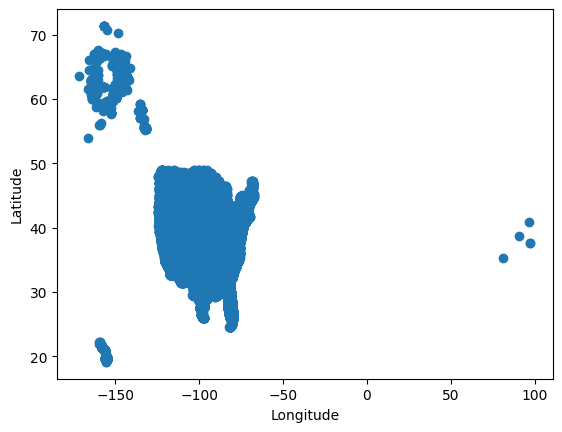

In [65]:
#print the scatter plot
plt.scatter(incidents['longitude'], incidents['latitude'])

#label the axis
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

As we can see from the figure above we can actually find three big clusters of data, those in the upper left, those in the lower left, and the big ones in the middle. In fact once we do an analysis of these points with geopy we can see that:
- the points in the lower left fall on Hawaii soil;
- the points in the upper left fall on the soil of Alaska;
- the points in the largest cluster - the middle one - fall on the soil of the remaining 48 federal states.

 There are then 4 isolated points to the right of the graph. Those points turn out to be outliers. In fact always using a graph viewer, one could see how those points actually fall on Chinese soil. As outliers so we transform their values into the *latitude* and *longitude* columns equal to NaN. 

In [66]:
incidents['latitude'].mask(incidents['longitude'] > 70, np.nan, inplace=True)
incidents['longitude'].mask(incidents['longitude'] > 70, np.nan,  inplace=True)

If we reprint the scatter plot from before now we can see how we get a much more compact thing, in which we can recognize even by eye the shape of the United States in the central cluster. Finally, in the Alaska cluster we can see how the dots are less compact, but this is also due to the fact that most of the soil in the Alaskan territory is not habitable - and so it is difficult to expect to find accidents there.

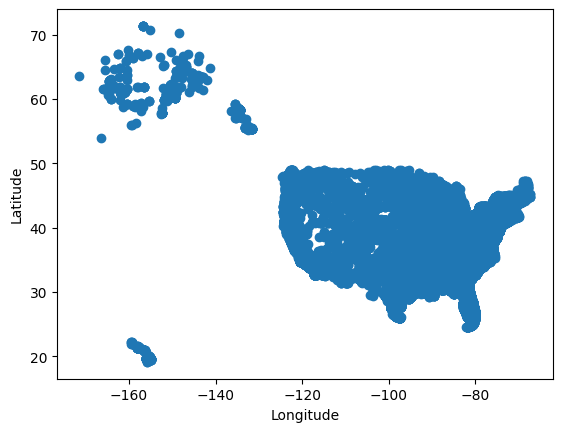

In [67]:
plt.scatter(incidents['longitude'], incidents['latitude'])

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

### Poverty - povertyPercentage

Let us now look at the *poverty_percentage* column in the poverty dataframe. Of this column we already know NaN values, as we had eliminated them previously - they were all rows where the dataframe possessed only *year* and *state* data, and so it did not make sense to keep them. The only check we need to do now then is to see that indeed the data within this column are percentage data, that is, numbers between 0 and 100. We then perform this check.

In [68]:
is_percentage_valid = (poverty['povertyPercentage'] >= 0) & (poverty['povertyPercentage'] <= 100)
all_percentages_valid = is_percentage_valid.all()
print(all_percentages_valid)

True


As we can see from the True result of the code above, the povertyPercentage values actually always remain between 0 and 100. So we consider the column already clean.

### District - party

This column in the dataframe district should show the winning political parties for the corresponding congressional districts in the state and in the corresponding year. We know that the major American political parties are the Democratic and Republican parties. However, there are minor parties that may have won a few congressional districts over the years, but the idea is that in this specific column we can print the **value_counts()** since we expect to find a few different values there.

In [69]:
print("The NaN row in party column are", district['party'].isna().sum())
print()
district['party'].value_counts()

The NaN row in party column are 0



party
DEMOCRAT                   5513
REPUBLICAN                 4857
DEMOCRATIC-FARMER-LABOR      58
INDEPENDENT                  10
INDEPENDENT-REPUBLICAN        2
FOGLIETTA (DEMOCRAT)          1
Name: count, dtype: int64

So we can see how first of all there are no NaN values in the *party* column, and also as we thought only six different values appear in this column throughout the dataframe. We also see how Democrat and Republican account for 99% of the total data. We can see so that there is only one outlier in this data: while Democratic-Farmer-Labor, Independet-Republican, and Independent actually represent minor parties - the first two present only in Minnesota - in contrast, Foglietta (Democrat) does not represent any truly existing party. Foglietta will probably have been a party figure in that specific congressional district, but we still do not consider that an acceptable value. Instead, we think it is clear that the party to which Foglietta belonged, and thus the winning party, is the Democrat. We then simply go on to replace this occurrence with Democrat, and consider after that the analysis on the column concluded.

In [70]:
district['party'].replace("FOGLIETTA (DEMOCRAT)", "DEMOCRAT", inplace=True)

### District - candidatevotes, totalvotes

In the latter two columns are represented:
- in the *candidatevotes* column the number of votes obtained by the winning party in the corresponding election;
- in the *totalvotes* column the number of total votes for the corresponding election.
We then go on to check these columns. The first and obvious check is to print out the **value_counts()** to see if we find any data coming out more often than the others - in these columns we expect fairly scattered data, since it is difficult for votes to be the same in different elections.

In [71]:
print(district["candidatevotes"].value_counts())
print()
print(district["totalvotes"].value_counts())

candidatevotes
1         183
179349      3
109726      3
98821       3
99502       3
         ... 
91915       1
129698      1
144195      1
125823      1
223981      1
Name: count, Length: 9927, dtype: int64

totalvotes
1         183
139054      3
184677      2
152166      2
156281      2
         ... 
233097      1
245430      1
242707      1
247531      1
198198      1
Name: count, Length: 10033, dtype: int64


But as we see in fact in both columns there are exactly 183 occurrences of the value 1. Obviously the presence of the value 1 does not seem sensible to us, since the existence of elections in which there is only one vote on the ballot seems quite remote. In any case, we check that indeed the value 1 in the *candidatevotes* column always and only appears when the value 1 appears in the *totalvotes* column, and then print all occurrences of *state* and *congressional_district* when this happens.

In [72]:
print("The total votes associated with rows where candidatevotes is 1 are:", district[district['candidatevotes'] == 1]["totalvotes"].unique())
print() 
votes_1 = district[district['candidatevotes'] == 1][['state', 'congressional_district']].value_counts()
print(votes_1)

The total votes associated with rows where candidatevotes is 1 are: [1]

state      congressional_district
LOUISIANA  3                         11
           1                         10
           4                         10
           7                         10
           5                          9
           2                          9
           6                          8
FLORIDA    10                         7
           3                          7
           17                         6
           12                         6
           14                         5
           13                         5
ARKANSAS   1                          5
FLORIDA    7                          5
           4                          5
           23                         4
           8                          4
           5                          4
LOUISIANA  8                          4
ARKANSAS   3                          4
           4                          4
FLORIDA    21

Effectively the values 1 come out in pairs in the two columns, however there does not seem to be an order in their output. It could be that it is entered when we do not have or have not entered the election vote data, and we enter this figure, which makes us understand that the winning party gets 100% of the votes - that is, only 1. We decide to keep these lines for now, and then turn to more general checks.

Indeed, we move on to transform the values in the rows where we have inconsistent data to NaN. In fact, we expect that no negative or zero values can be found in the two columns - a candidate cannot get a negative number of votes and there are no votes with a total number of negative votes - and that the value in *candidatevotes* is not greater than the value in *totalvotes*. So we check when this happens and transform the data in these occurrences to NaN. 

In [73]:
print(district[['candidatevotes', 'totalvotes']].isna().sum())

district["candidatevotes"].mask(district['candidatevotes'] <= 0, inplace=True)
district["totalvotes"].mask(district['totalvotes'] <= 0, inplace=True)
district["candidatevotes"].mask(district['candidatevotes'] > district['totalvotes'], inplace=True)

print(district[['candidatevotes', 'totalvotes']].isna().sum())

candidatevotes    0
totalvotes        0
dtype: int64
candidatevotes    2
totalvotes        2
dtype: int64


We see that only four values are transformed to NaN - two per row - and with a check we could see that this happens because of the existence of a negative or zero values in the columns. At this point we decide to eliminate the rows with null data - there may be two, three or four - since keeping a couple of dirty rows on such a clean dataframe seems a shame for us. 

In [74]:
district.dropna(subset=['candidatevotes'], inplace=True)
district.dropna(subset=['totalvotes'], inplace=True)

### Add ratio column

Finally, to close the cleaning part by columns, we move on to define as done earlier a new, more meaningful column. In fact, rather than having the total number of votes the winning party received, it seems better to us to possess the percentage figure of how many votes the winning party received relative to the total number of votes. The argument of why this is better in our opinion is the same as the one made above, so we will avoid repeating it. We then move on to add the *candidatevotes_ratio* column.

In [75]:
district['candidatevotes_ratio'] = district['candidatevotes'] / district['totalvotes']
print(district['candidatevotes_ratio'].value_counts())

candidatevotes_ratio
1.000000    405
0.625164      1
0.601581      1
0.511912      1
0.582910      1
           ... 
0.711115      1
0.609279      1
0.459756      1
0.492017      1
0.667040      1
Name: count, Length: 10035, dtype: int64


## Add other columns

In this section we deal with adding new columns to the dataset with different information that could be useful during the course of our analyses. Recall that during the data cleaning operations we have already added some columns that are for all intents and purposes internal indicators, that is, all the columns inherent in the percentages - so for example *n_male_ratio*, *n_killed_ratio*, *candidatevotes* and so on. We now move on to add others.


### Internal indicators

The first types of information we add are extracted from the dataset and concern the number of incidents that occur by state and city. Then we create two new columns, called *incidents_state* and *incidents_city*, which count the number of occurrences of each state in the *state* column and each city in the *city* column, respectively. To do this we use the *groupby* function.

In [76]:
incidents['incidents_state'] = incidents.groupby('state')['state'].transform('count')
incidents['incidents_city'] = incidents.groupby(['city_or_county','state'])['city_or_county'].transform('count')

incidents.head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,incident_characteristics1,month,day,n_participants_child_ratio,n_participants_teen_ratio,n_participants_adult_ratio,n_males_ratio,n_females_ratio,n_killed_ratio,n_injured_ratio,n_unharmed_ratio,n_arrested_ratio,incidents_state,incidents_city
0,2015-05-02,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,19.0,19.0,19.0,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,Shot - Wounded/Injured,5,2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,5850,1917
1,2017-04-03,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,62.0,62.0,62.0,0.0,0.0,1.0,1.0,0.0,1,0,0.0,0.0,1.0,"Shot - Dead (murder, accidental, suicide)",4,3,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,8927,3
2,2016-11-05,Michigan,Detroit,6200 Block of East McNichols Road,42.4190,-83.0393,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.0,1.0,2.0,Shot - Wounded/Injured,11,5,NaN,NaN,NaN,NaN,NaN,0.0,0.5,0.5,0.0,6130,1829
3,2016-10-15,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,2.0,Shot - Wounded/Injured,10,15,0.0,0.0,0.5,0.5,0.0,0.0,0.5,0.0,0.0,3181,3175
4,2020-06-14,Pennsylvania,Pittsburgh,California and Marshall Avenues,40.4621,-80.0308,14.0,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0,1,0.0,1.0,2.0,Shot - Wounded/Injured,6,14,0.0,0.0,0.5,0.5,0.0,0.0,0.5,0.5,0.0,8927,936


Other internal indicators we can find are as follows:
- the percentage of *n_killed* and *n_injured* in the every incidents compared to the total of *n_killed* and *n_injured* in the same *city_or_county* for each year;
- the same can be done for *n_participants_teen* and *n_participants_child*.

We choose these columns because of all the columns that report information about participants in an accident they are the ones that have positive values least often - it is easier to have accidents with adults than with child as participants - or because they represent more interesting information than the others - it is more interesting to study cases in which people are injured or killed than cases in which they are unharmed.

At the end of the calculation we print out how many NaN values we will have of the new columns. As we might have expected, while the NaN values in *n_killed* and *n_injured* are relatively small compared to the size of the dataframe, the NaN values in the *n_participants_teen* and *n_participants_child* columns are significantly larger. This is due to the fact that in these last two columns data are often not entered being that in most of the incidents in our dataframe the participants are mostly adults. We decide to use these columns anyway because, since there are fewer rows with NaN values, we expect the probabilities within them to be higher and therefore more meaningful - one will easily be able to find the accident in which more teens participate in a given city in a given year. 

In [77]:
# Extract the year from the 'date' column
incidents['year'] = incidents['date'].dt.year

# Calculate the total number of killed and injured in the same city for each year
killed_totals = incidents.groupby(['state', 'city_or_county', 'year'])[['n_killed', 'n_injured']].sum().reset_index()
participants_totals = incidents.groupby(['state', 'city_or_county', 'year'])[['n_participants_teen', 'n_participants_child']].sum().reset_index()

# Merge the calculated totals back to the incidents DataFrame
incidents = pd.merge(incidents, killed_totals, on=['state', 'city_or_county', 'year'], suffixes=('', '_cities_total'))
incidents = pd.merge(incidents, participants_totals, on=['state', 'city_or_county', 'year'], suffixes=('', '_cities_total'))

# Calculate the percentage for each indicator
incidents['n_killed_percentage'] = incidents['n_killed'] / incidents['n_killed_cities_total']
incidents['n_injured_percentage'] = incidents['n_injured'] / incidents['n_injured_cities_total']
incidents['n_participants_teen_percentage'] = incidents['n_participants_teen'] / incidents['n_participants_teen_cities_total']
incidents['n_participants_child_percentage'] = incidents['n_participants_child'] / incidents['n_participants_child_cities_total']

incidents = incidents.drop(columns=['n_killed_cities_total', 'n_injured_cities_total', 'n_participants_teen_cities_total', 'n_participants_child_cities_total', 'year'])

incidents[['n_killed_percentage','n_injured_percentage', 'n_participants_teen_percentage', 'n_participants_child_percentage']].isna().sum()


n_killed_percentage                 39714
n_injured_percentage                29916
n_participants_teen_percentage      99517
n_participants_child_percentage    144169
dtype: int64

### External datasets

At this point we move on to combining information taken from external datasets. The first fundamental information that can be combined with our dataset was the number of inhabitants per city. We examined various datasets, and in the end we found a dataset that in our opinion represented the best choice - both in terms of reliability and the number of cities presented. This dataset uses information from the U.S. Geological Survey and the U.S. Census Bureau and is updated on January 1, 2023. We tried to find a dataset that expressed the population for each city in relation to the year, but we made the following considerations:
- most of the datasets with a lot of information were obscured or paid for, and we had no possibility of using them;
- among the datasets made available, those with the population of the cities that varies with the year, only had information from a few cities - around a thousand - compared to the much higher number in our dataset;
- the population of a city can vary over the years, but since we analyze a small number of years, the change is almost imperceptible. A city that is considered large - for example New York or Los Angeles - remains large, and a small town remains small.

In light of these considerations, using a dataset with information updated to 2023 did not seem like a big problem to us, as the data on the population obtained represents - especially in relation to the analyzes in which we will use it - statistically reliable data even for past years .

In [78]:
cities_population=pd.read_csv('New_Data/uscities.csv')
cities_population.head()

,city,city_ascii,state_id,state_name,county_fips,county_name,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,New York,New York,NY,New York,36081,Queens,40.6943,-73.9249,18972871,10768.2,shape,False,True,America/New_York,1,11229 11226 11225 11224 11223 11221 11220 1138...,1840034016
1,Los Angeles,Los Angeles,CA,California,6037,Los Angeles,34.1141,-118.4068,12121244,3267.6,shape,False,True,America/Los_Angeles,1,90291 90293 90292 91316 91311 90035 90034 9003...,1840020491
2,Chicago,Chicago,IL,Illinois,17031,Cook,41.8375,-87.6866,8595181,4576.6,shape,False,True,America/Chicago,1,60018 60649 60641 60640 60643 60642 60645 6064...,1840000494
3,Miami,Miami,FL,Florida,12086,Miami-Dade,25.7840,-80.2101,5711945,4945.7,shape,False,True,America/New_York,1,33128 33129 33125 33126 33127 33149 33144 3314...,1840015149
4,Dallas,Dallas,TX,Texas,48113,Dallas,32.7935,-96.7667,5668165,1522.2,shape,False,True,America/Chicago,1,75287 75098 75234 75254 75251 75252 75253 7503...,1840019440


At this point, after having loaded the new dataset which we called **cities_population**, we proceeded to discard the columns that we did not consider interesting, and kept those that we considered useful instead. We then renamed the two columns that we would use as a discriminant to join this information to the incidents dataframe, i.e. *state* and *city_or_county*. In the end our new dataframe has the following 4 columns:
- *city_or_county*: the name of the city;
- *state*: the name of the state to which the city belongs;
- *population*: the number of the city's population;
- *density*: the population density of the city, i.e. how many inhabitants there are per square kilometre.

In [79]:
cities_population = cities_population.drop('lat', axis='columns')
cities_population = cities_population.drop('lng', axis='columns')
cities_population = cities_population.drop('city_ascii', axis='columns')
cities_population = cities_population.drop('state_id', axis='columns')
cities_population = cities_population.drop('county_fips', axis='columns')
cities_population = cities_population.drop('county_name', axis='columns')
cities_population = cities_population.drop('source', axis='columns')
cities_population = cities_population.drop('military', axis='columns')
cities_population = cities_population.drop('incorporated', axis='columns')
cities_population = cities_population.drop('timezone', axis='columns')
cities_population = cities_population.drop('ranking', axis='columns')
cities_population = cities_population.drop('zips', axis='columns')
cities_population = cities_population.drop('id', axis='columns')


cities_population.rename(columns={'city': 'city_or_county'}, inplace=True)
cities_population.rename(columns={'state_name': 'state'}, inplace=True)

cities_population.head()

,city_or_county,state,population,density
0,New York,New York,18972871,10768.2
1,Los Angeles,California,12121244,3267.6
2,Chicago,Illinois,8595181,4576.6
3,Miami,Florida,5711945,4945.7
4,Dallas,Texas,5668165,1522.2


At this point we proceeded to eliminate all the lines in which the population data was 0 - these were in fact present - as these lines did not provide us with truly useful information. Furthermore, to be safe, we have eliminated duplicates, in case there were any. At this point we used the **merge()** command to add the two new columns - *population* and *density* - to the incidents dataframe. We used the *how=left* command to mean that we wanted to use only the occurrences of cities present in our reference dataframe, i.e. incidents.

In [80]:
cities_population=cities_population[cities_population["population"]!=0]

cities_population=cities_population.drop_duplicates()

incidents=pd.merge(incidents, cities_population, on=['city_or_county', 'state'], how='left')

Finally we print how many occurrences of these new two columns are null. In particular we see that approximately 28 thousand rows are null, a fairly small number compared to the approximately 240 thousand rows of the incidents dataframe. These null lines are due to the fact that in the *city_or_county* column of incidents there is not always the name of a city, but sometimes also the name of a county, which makes it difficult to truly understand the population. However, we considered the number of null data acceptable, especially considering how many null values we would have had using other datasets - around 100 thousand null rows.

In [81]:
incidents[["population", "density"]].isnull().sum()

population    27736
density       27736
dtype: int64

At this point we instead use a new dataframe to obtain other types of information. This dataset actually represented our first choice also the population of cities, but unfortunately it only presents data for cities with a population greater than 65 thousand inhabitants. We can therefore say that the information we will add using this dataset is inherent only to medium/large cities. This dataset also uses information from the U.S. Geological Survey and the U.S. Census Bureau and is updated to 2023. The considerations on why we considered this dataset reliable despite having information for a single year are the same as above. So we will not use all the columns of this downloaded dataset, but only some. Let's start by downloading the dataset, which we call *info_cities*, and display it.

In [82]:
info_cities = pd.read_csv('New_Data/us-cities-demographics.csv', sep=";")
info_cities.head()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402
1,Peoria,Illinois,33.1,56229.0,62432.0,118661,6634.0,7517.0,2.40,IL,American Indian and Alaska Native,1343
2,O'Fallon,Missouri,36.0,41762.0,43270.0,85032,5783.0,3269.0,2.77,MO,Hispanic or Latino,2583
3,Hampton,Virginia,35.5,66214.0,70240.0,136454,19638.0,6204.0,2.48,VA,Black or African-American,70303
4,Lakewood,Colorado,37.7,76013.0,76576.0,152589,9988.0,14169.0,2.29,CO,Hispanic or Latino,33630


We then proceed to eliminate the columns that do not interest us and rename the columns with the information relating to the states and cities, in order to facilitate the subsequent task of adding the new columns to our dataframe using these two as discriminants. In the end we will then have the following new columns to add to our incidents dataframe:
- *Median Age*: in this column we have the number of the average age of the inhabitants of each city;
- *Male Population*: in this column we have the number of the male population relating to each city;
- *Female Population*: in this column we have the number of female population relating to each city;
- *Number of Veterans*: in this column we have the number of veterans present in each city;
- *Foreign-born*: in this column we have the number of non-citizen inhabitants of the United States present in each city;
- *Average Household Size*: in this column we have the number indicating the average size of families for each city.

In [83]:
info_cities = info_cities.drop('Total Population', axis='columns')
info_cities = info_cities.drop('State Code', axis='columns')
info_cities = info_cities.drop('Race', axis='columns')
info_cities = info_cities.drop('Count', axis='columns')

info_cities.rename(columns={'City': 'city_or_county'}, inplace=True)
info_cities.rename(columns={'State': 'state'}, inplace=True)

Let's now count how many null rows there are for each column in this dataframe. Let's see how they are very few, which makes the data acceptable.

In [84]:
info_cities.isnull().sum()

city_or_county             0
state                      0
Median Age                 0
Male Population            3
Female Population          3
Number of Veterans        13
Foreign-born              13
Average Household Size    16
dtype: int64

We then move on to join these new columns to the incidents dataframe using exactly the same commands as above. We then print the number of rows in which the values are zero, and we see that they are around 100 thousand - as we said above. This depends on the fact that these cities have a low number of inhabitants, or that in the incidents dataset the name of the city is not reported but that of the county. However, we consider these numbers acceptable, because we will use these data to make inference only on large cities.

In [85]:
info_cities=info_cities.drop_duplicates()

incidents=pd.merge(incidents, info_cities, on=['city_or_county', 'state'], how='left')

incidents[["Median Age", "Male Population", "Female Population", "Number of Veterans", "Foreign-born", "Average Household Size"]].isnull().sum()

Median Age                97274
Male Population           97282
Female Population         97282
Number of Veterans        97274
Foreign-born              97274
Average Household Size    97282
dtype: int64

## Join the dataset

After studying the general characteristics of the three datasets, we can move on to join them, using the column indices in common, to obtain one large table containing all the information from the three datasets, which we call **join_dataset**. We note that when we merge according to the columns in common, we always use the columns of the incidents dataframe as discriminants. In fact, it is the largest dataframe - both in terms of number of rows and columns - and the main one we work with, and we want the two poverty and district dataframes to be just an addition to the information already possessed in incidents. It may be for this reason - as already mentioned previously - that for example we will not see the United States instance appear in the *state* column - it is present in the poverty dataframe but not in incidents.

In [86]:
# Add and reorder year column to join poverty table
columns = incidents.columns
incidents['year'] = pd.to_datetime(incidents['date']).dt.year
incidents = incidents[columns.insert(columns.get_loc('date') + 1, 'year')]
join_1 = pd.merge(incidents, poverty, on=['year','state'], how='left')

#join_1.head()

# Workaround to join district table
temp = join_1['state']
join_1['state'] = join_1['state'].str.upper()
join_dataset = pd.merge(join_1, district, on=['year','state','congressional_district'], how='left')
join_dataset['state'] = temp

join_dataset.tail()

,date,year,state,city_or_county,address,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,incident_characteristics1,month,day,n_participants_child_ratio,n_participants_teen_ratio,n_participants_adult_ratio,n_males_ratio,n_females_ratio,n_killed_ratio,n_injured_ratio,n_unharmed_ratio,n_arrested_ratio,incidents_state,incidents_city,n_killed_percentage,n_injured_percentage,n_participants_teen_percentage,n_participants_child_percentage,population,density,Median Age,Male Population,Female Population,Number of Veterans,Foreign-born,Average Household Size,povertyPercentage,party,candidatevotes,totalvotes,candidatevotes_ratio
239477,2015-08-12,2015,Ohio,Dayton (Moraine),3200 block of Shadyview Road,39.6892,-84.2326,10.0,36.0,36.0,36.0,0.0,0.0,2.0,2.0,0.0,0,1,0.0,1.0,2.0,Shot - Wounded/Injured,8,12,0.0,0.0,1.0,1.0,0.0,0.0,0.5,0.5,0.0,10244,6,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3,NaN,NaN,NaN,NaN
239478,2015-09-16,2015,Texas,Balch Springs,11513 Marriott,32.7302,-96.6295,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0,1,0.0,0.0,1.0,Shot - Wounded/Injured,9,16,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,13519,6,NaN,1.0,NaN,NaN,27369.0,1074.9,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN
239479,2017-08-10,2017,Michigan,La Salle,I-75 and Gaynier Rd,41.8237,-83.4357,7.0,37.0,37.0,37.0,0.0,0.0,1.0,1.0,0.0,0,0,1.0,0.0,1.0,Non-Shooting Incident,8,10,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6130,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.7,NaN,NaN,NaN,NaN
239480,2018-03-06,2018,Maryland,Temple Hills,6901 Temple Hill Rd,38.7962,-76.9281,4.0,14.0,14.0,14.0,0.0,1.0,0.0,1.0,0.0,0,0,1.0,0.0,1.0,Institution/Group/Business,3,6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5777,26,NaN,NaN,1.0,NaN,9037.0,2254.8,NaN,NaN,NaN,NaN,NaN,NaN,8.1,DEMOCRAT,209642.0,268583.0,0.780548
239481,2015-05-11,2015,Maryland,Prince George,Central Avenue and Addison Road,38.8869,-76.8981,4.0,34.0,34.0,34.0,0.0,0.0,1.0,1.0,0.0,1,0,0.0,0.0,1.0,"Shot - Dead (murder, accidental, suicide)",5,11,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,5777,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.2,NaN,NaN,NaN,NaN


Once we have merged the three tables we will have many new null data - due to lack of information. Let's count them using the **.isnull().sum()** command.

In [87]:
null_counts = join_dataset.isnull().sum()
print(null_counts)

date                                    0
year                                    0
state                                   0
city_or_county                          0
address                             16473
latitude                             7931
longitude                            7931
congressional_district              11946
min_age_participants                92070
avg_age_participants                92074
max_age_participants                92073
n_participants_child                41886
n_participants_teen                 41886
n_participants_adult                41886
n_males                             36134
n_females                           36134
n_killed                                0
n_injured                               0
n_arrested                          27404
n_unharmed                          27404
n_participants                      24640
incident_characteristics1             818
month                                   0
day                               

Finally in this last part we create a second dataframe identical to **join_dataset** using the **copy** command from the library of the same name. After that we also move on to transform the last columns with object-type data, that is, those with string data in them, to numeric-type data. We do this with the **fit_transform** command found in **LabelEncoder**, creating labels that identify each equal string and associate it with the same numeric data. We create a new table this way, so having all numeric data we can do correlation on the whole dataset. We still keep the original table because, for example, being able to distinguish a state by its name, and not treating it as just a number, helps us make considerations about what the data is telling us and make them understandable to everyone.

In [88]:
from sklearn.preprocessing import LabelEncoder
import copy

dataset_without_string = copy.copy(join_dataset)

le = LabelEncoder()
columns_not_numeric = [ 'state', 'city_or_county', 'address', 'incident_characteristics1', 'party']
for column in columns_not_numeric:
    dataset_without_string[column] = le.fit_transform(dataset_without_string[column])

dataset_without_string.head()

,date,year,state,city_or_county,address,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,incident_characteristics1,month,day,n_participants_child_ratio,n_participants_teen_ratio,n_participants_adult_ratio,n_males_ratio,n_females_ratio,n_killed_ratio,n_injured_ratio,n_unharmed_ratio,n_arrested_ratio,incidents_state,incidents_city,n_killed_percentage,n_injured_percentage,n_participants_teen_percentage,n_participants_child_percentage,population,density,Median Age,Male Population,Female Population,Number of Veterans,Foreign-born,Average Household Size,povertyPercentage,party,candidatevotes,totalvotes,candidatevotes_ratio
0,2015-05-02,2015,14,5425,166064,39.8322,-86.2492,7.0,19.0,19.0,19.0,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,18,5,2,0.0,0.0,1.0,1.0,0.0,0.000000,1.0,0.0,0.000000,5850,1917,0.000000,0.004902,0.0,0.0,1659305.0,928.2,34.1,410615.0,437808.0,42186.0,72456.0,2.53,12.3,3,NaN,NaN,NaN
1,2015-04-15,2015,14,5425,126239,39.7150,-86.2981,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,12,4,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5850,1917,0.000000,0.000000,NaN,NaN,1659305.0,928.2,34.1,410615.0,437808.0,42186.0,72456.0,2.53,12.3,3,NaN,NaN,NaN
2,2015-01-10,2015,14,5425,54096,39.7991,-86.1602,7.0,32.0,32.0,32.0,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,18,1,10,0.0,0.0,1.0,1.0,0.0,0.000000,1.0,0.0,0.000000,5850,1917,0.000000,0.004902,0.0,0.0,1659305.0,928.2,34.1,410615.0,437808.0,42186.0,72456.0,2.53,12.3,3,NaN,NaN,NaN
3,2015-08-14,2015,14,5425,75591,39.7746,-86.1096,7.0,18.0,24.0,37.0,0.0,0.0,3.0,3.0,0.0,1,0,2.0,0.0,3.0,17,8,14,0.0,0.0,1.0,1.0,0.0,0.333333,0.0,0.0,0.666667,5850,1917,0.008475,0.000000,0.0,0.0,1659305.0,928.2,34.1,410615.0,437808.0,42186.0,72456.0,2.53,12.3,3,NaN,NaN,NaN
4,2015-09-18,2015,14,5425,194208,39.7947,-86.2410,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,12,9,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5850,1917,0.000000,0.000000,NaN,NaN,1659305.0,928.2,34.1,410615.0,437808.0,42186.0,72456.0,2.53,12.3,3,NaN,NaN,NaN


## Normalizing the Dataset

We are entering the final part of cleaning the dataset. In this final section we replace all NaNs in some numeric columns, such as *min_age_participants*, with the average of the same columns. We do this to avoid having too many null values, but at the same time not affecting statistics about the distribution of values in the columns we are working on. In each case we save these results in a separate dataframe, which we will call **normalized_incidents**..

In [89]:
mean_values = join_dataset.select_dtypes(include='number').mean().round(2)

normalized_incidents = join_dataset.fillna(mean_values, inplace=False)

display(normalized_incidents.head())

,date,year,state,city_or_county,address,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,incident_characteristics1,month,day,n_participants_child_ratio,n_participants_teen_ratio,n_participants_adult_ratio,n_males_ratio,n_females_ratio,n_killed_ratio,n_injured_ratio,n_unharmed_ratio,n_arrested_ratio,incidents_state,incidents_city,n_killed_percentage,n_injured_percentage,n_participants_teen_percentage,n_participants_child_percentage,population,density,Median Age,Male Population,Female Population,Number of Veterans,Foreign-born,Average Household Size,povertyPercentage,party,candidatevotes,totalvotes,candidatevotes_ratio
0,2015-05-02,2015,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,19.00,19.0,19.0,0.00,0.00,1.00,1.00,0.00,0,1,0.00,0.00,1.00,Shot - Wounded/Injured,5,2,0.00,0.00,1.00,1.00,0.0,0.000000,1.00,0.00,0.000000,5850,1917,0.000000,0.004902,0.00,0.00,1659305.0,928.2,34.1,410615.0,437808.0,42186.0,72456.0,2.53,12.3,NaN,172009.54,256699.77,0.68
1,2015-04-15,2015,Indiana,Indianapolis,7800 Col. H. Weir Cook Memorial Drive,39.7150,-86.2981,7.0,28.33,30.0,31.8,0.02,0.13,1.55,1.52,0.21,0,0,0.47,0.49,1.83,Non-Shooting Incident,4,15,0.01,0.07,0.87,0.86,0.1,0.170000,0.34,0.21,0.260000,5850,1917,0.000000,0.000000,0.05,0.02,1659305.0,928.2,34.1,410615.0,437808.0,42186.0,72456.0,2.53,12.3,NaN,172009.54,256699.77,0.68
2,2015-01-10,2015,Indiana,Indianapolis,2300 block of North Kenwood Avenue,39.7991,-86.1602,7.0,32.00,32.0,32.0,0.00,0.00,1.00,1.00,0.00,0,1,0.00,0.00,1.00,Shot - Wounded/Injured,1,10,0.00,0.00,1.00,1.00,0.0,0.000000,1.00,0.00,0.000000,5850,1917,0.000000,0.004902,0.00,0.00,1659305.0,928.2,34.1,410615.0,437808.0,42186.0,72456.0,2.53,12.3,NaN,172009.54,256699.77,0.68
3,2015-08-14,2015,Indiana,Indianapolis,3300 block of East Michigan Street,39.7746,-86.1096,7.0,18.00,24.0,37.0,0.00,0.00,3.00,3.00,0.00,1,0,2.00,0.00,3.00,"Shot - Dead (murder, accidental, suicide)",8,14,0.00,0.00,1.00,1.00,0.0,0.333333,0.00,0.00,0.666667,5850,1917,0.008475,0.000000,0.00,0.00,1659305.0,928.2,34.1,410615.0,437808.0,42186.0,72456.0,2.53,12.3,NaN,172009.54,256699.77,0.68
4,2015-09-18,2015,Indiana,Indianapolis,West 21st,39.7947,-86.2410,7.0,28.33,30.0,31.8,0.02,0.13,1.55,1.52,0.21,0,0,0.47,0.49,1.83,Non-Shooting Incident,9,18,0.01,0.07,0.87,0.86,0.1,0.170000,0.34,0.21,0.260000,5850,1917,0.000000,0.000000,0.05,0.02,1659305.0,928.2,34.1,410615.0,437808.0,42186.0,72456.0,2.53,12.3,NaN,172009.54,256699.77,0.68


In [90]:
normalized_incidents.isnull().sum()

date                                    0
year                                    0
state                                   0
city_or_county                          0
address                             16473
latitude                                0
longitude                               0
congressional_district                  0
min_age_participants                    0
avg_age_participants                    0
max_age_participants                    0
n_participants_child                    0
n_participants_teen                     0
n_participants_adult                    0
n_males                                 0
n_females                               0
n_killed                                0
n_injured                               0
n_arrested                              0
n_unharmed                              0
n_participants                          0
incident_characteristics1             818
month                                   0
day                               

# Correlation

In this section we are concerned with making correlation between data and evaluating the results obtained. As a first step we print the table with the correlation between all the data to give us a general idea, using the **.corr** command.

In [91]:
dataset_without_string.corr(numeric_only=True)

,year,state,city_or_county,address,latitude,longitude,congressional_district,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,incident_characteristics1,month,day,n_participants_child_ratio,n_participants_teen_ratio,n_participants_adult_ratio,n_males_ratio,n_females_ratio,n_killed_ratio,n_injured_ratio,n_unharmed_ratio,n_arrested_ratio,incidents_state,incidents_city,n_killed_percentage,n_injured_percentage,n_participants_teen_percentage,n_participants_child_percentage,population,density,Median Age,Male Population,Female Population,Number of Veterans,Foreign-born,Average Household Size,povertyPercentage,party,candidatevotes,totalvotes,candidatevotes_ratio
year,1.000000,-0.015234,0.003865,-0.008696,-0.047559,-0.002798,0.024376,0.016858,0.007797,-0.002183,-0.042156,-0.060471,-0.042705,-0.058716,-0.049984,-0.073998,0.028188,-0.007304,-0.022939,-0.059492,-0.027358,-0.141502,0.001228,-0.035414,-0.054307,0.039522,0.001591,-0.020893,-0.073234,0.050734,0.000497,0.014598,0.007037,-0.026512,-0.007943,0.049872,-0.012883,-0.017437,-0.017611,-0.036158,0.005862,-0.027345,-0.027908,-0.003475,-0.023870,0.012002,-0.239260,0.168240,0.504108,0.529996,-0.032487
state,-0.015234,1.000000,0.036980,0.032669,0.144974,0.203874,-0.058877,0.003717,0.010991,0.017529,0.013811,0.002014,0.033110,0.021788,0.022531,-0.011482,-0.009073,0.024945,0.030431,0.029178,0.009261,-0.000495,-0.001762,0.010120,-0.003648,0.004458,-0.018871,0.016651,-0.026452,-0.010028,0.026775,0.012686,-0.232023,-0.132331,0.011339,0.020885,0.011036,0.012849,-0.117300,-0.025560,-0.186866,-0.076564,-0.077847,0.011707,-0.116360,-0.172091,-0.109685,0.022906,-0.042426,-0.033412,-0.013543
city_or_county,0.003865,0.036980,1.000000,0.009200,-0.037944,-0.069566,0.001204,0.020247,0.027035,0.030810,0.002743,0.002742,0.026357,0.009505,0.013108,-0.007308,-0.032398,0.025849,0.021553,0.016339,-0.035176,-0.001537,0.001351,0.002243,-0.003497,0.019721,-0.015614,0.010023,-0.008373,-0.042074,0.025264,0.027465,-0.125761,-0.227083,0.024755,0.028407,0.029332,0.023137,-0.193696,-0.119082,0.067948,-0.244381,-0.247352,-0.169245,-0.196201,0.050769,0.030337,0.030662,-0.080253,-0.016589,-0.090849
address,-0.008696,0.032669,0.009200,1.000000,-0.004879,0.019514,-0.027028,0.029601,0.019183,0.006748,-0.003566,-0.019105,-0.017627,-0.032332,-0.009833,-0.070254,-0.051309,0.035332,0.021472,-0.030514,-0.060994,-0.002531,-0.003379,-0.006214,-0.023379,0.034284,0.003449,-0.001600,-0.065199,-0.041472,0.031083,0.073809,-0.078867,-0.109963,0.024876,0.061214,0.027147,0.022342,-0.083016,-0.016060,-0.005876,-0.057246,-0.058686,-0.044512,-0.040517,0.026746,0.056330,-0.000768,-0.036984,-0.015591,-0.038062
latitude,-0.047559,0.144974,-0.037944,-0.004879,1.000000,-0.056704,-0.258845,-0.008080,-0.024463,-0.037886,-0.020897,-0.005228,-0.057389,-0.038249,-0.037409,-0.080338,-0.011683,0.026234,-0.045877,-0.062310,-0.018389,0.015345,0.003986,-0.020996,0.005956,0.008384,0.047183,-0.025593,-0.071109,0.025890,-0.030002,0.061869,-0.322704,0.160204,-0.031194,-0.021329,-0.019806,-0.030163,0.109740,0.239337,-0.122431,0.067823,0.076405,-0.058774,0.005829,-0.182616,-0.575723,-0.027506,0.142373,0.179899,-0.089945
longitude,-0.002798,0.203874,-0.069566,0.019514,-0.056704,1.000000,-0.215414,-0.049174,-0.054227,-0.053928,-0.006647,0.004886,-0.006352,0.003716,-0.016598,-0.062281,0.037068,-0.021499,0.012835,-0.010007,-0.018839,0.006921,0.001812,-0.005447,0.011681,-0.005716,0.015537,-0.014276,-0.068123,0.066033,0.015366,-0.028191,-0.096279,0.077223,-0.050231,-0.027447,-0.031128,-0.026316,0.030533,0.172664,-0.024574,-0.056093,-0.039486,-0.066863,-0.131326,-0.367585,-0.042618,-0.004634,0.126766,0.099928,0.064040
congressional_district,0.024376,-0.058877,0.001204,-0.027028,-0.258845,-0.215414,1.000000,0.012848,0.014237,0.014276,-0.005111,-0.006223,0.013993,0.007983,-0.003571,0.055790,-0.007438,-0.003841,-0.009025,0.01

We now define two new functions:  

- **get_redundant_pairs**: in this function we transform the correlation matrix into an upper triangular matrix. In fact, the corelation matrix as constructed is symmetric, so it makes sense to eliminate all the equal pairs already analyzed in the top part of the matrix.

- **get_top_abs_correlation**: in this function we instead find and return the *n* pairs with the highest correlation in absolute value,thus considering both positive correlation - when data rise or fall together - and negative correlation - when data in one column goes up the others go down.

In [92]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


def get_top_abs_correlations(df, n=5):
    au_corr = df.corr(numeric_only=True).abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

At this point we go on to calculate the 50 pairs with highest absolute correlation using the functions defined earlier and print them.

In [93]:
print("Top Absolute Correlations")
corr_df = dataset_without_string[dataset_without_string.columns.difference(['date'])]
print("-------------------")
print(get_top_abs_correlations(corr_df, 50))
print("-------------------")

Top Absolute Correlations
-------------------
Female Population                Male Population                    0.999305
avg_age_participants             min_age_participants               0.950707
                                 max_age_participants               0.947863
Foreign-born                     Male Population                    0.941085
Female Population                Foreign-born                       0.933249
                                 population                         0.932297
Male Population                  population                         0.928377
Foreign-born                     population                         0.874527
Male Population                  Number of Veterans                 0.873303
Female Population                Number of Veterans                 0.872596
n_females_ratio                  n_males_ratio                      0.871355
candidatevotes                   totalvotes                         0.842398
n_unharmed                    

# Latitude and PovertyPercentage

One of the correlations that immediately attracted our attention is the one inherent in *latitude* related to *povertyPercentage*. So now we want to do an analysis on these types of data. 

First then we create a sub-dataframe that has within it the columns that we are interested in carrying out this analysis. To do this we then take the *state* and *povertyPercentage* columns from the poverty table, and from the incidents table we take the *state* column to which we associate as latitude the median of all latitudes associated with that state. At this point we merge the two tables along the *state* column using the **.merge()** command.

In [94]:
#select the desired columns
selected_columns = ['state', 'povertyPercentage']

#create a new dataframe with the selected columns
poverty_information = poverty[selected_columns]

latitude_information = incidents.groupby('state').agg({
    'latitude': 'median'  #compute the median of "latitude"
}).reset_index()

lat_pov_df=poverty_information.merge(latitude_information, on="state", how="inner")
lat_pov_df.head()


,state,povertyPercentage,latitude
0,Alabama,14.8,33.4182
1,Alabama,14.5,33.4182
2,Alabama,14.6,33.4182
3,Alabama,14.7,33.4182
4,Alabama,16.0,33.4182


We understand how many and which data are null in this dataset.

In [95]:
null_counts = lat_pov_df.isnull().sum()

print(null_counts)

state                0
povertyPercentage    0
latitude             0
dtype: int64


At this point we move on to clustering on latitudes to create a number of meaningful clusters into which to divide the united states to study how poverty varies with latitude. To do this we use the **k-Means** method found in the **sklearn.cluster** library. 

In order to use this method first it would be useful to try to figure out what the optimal number of clusters is. The idea then to figure out what is the ideal number of clusters is to use a method, called the **Elbow Method**. This involves training the k-Means model with a range of cluster values and calculating the inertia - sum of the square distances of the instances from the cluster center, also know as SSE - for each cluster value. Once this is done, one then looks for the point at which the inertia begins to change most slowly, creating an elbow curve. This point is considered the optimal number of clusters.

In general, we will want to create a number of clusters that give us an indicative idea of how poverty varies by latitude. One cluster is certainly not indicative, while 2 might already make sense if we think about the simple north-south division. Similarly, 20 clusters is certainly a lot. So let's vary the number of clusters in the Elbow Method between 2 and 10 and see which is best.

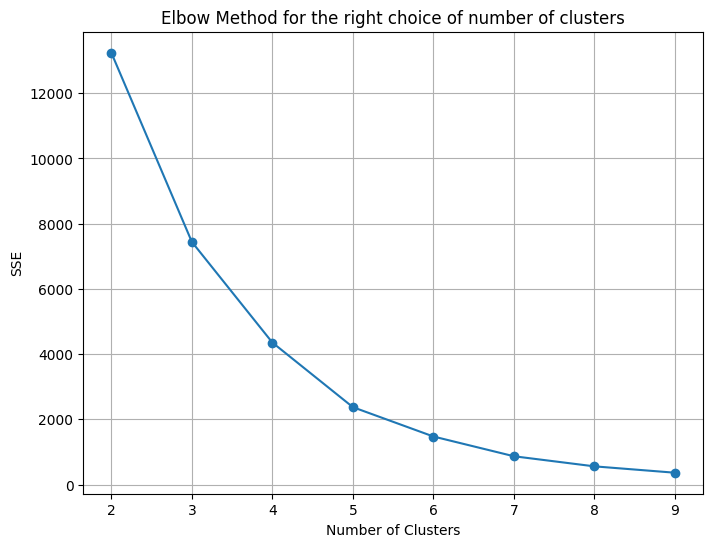

In [96]:
from sklearn.cluster import KMeans

num_clusters = list(range(2, 10))

# Compute inertia for each cluster
inertia = []
for n_clusters in num_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(lat_pov_df[['latitude']])
    inertia.append(kmeans.inertia_)

# Plot the inertia's values for each cluster
plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia, marker='o')
plt.title('Elbow Method for the right choice of number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()

From the graph printed above we see that 5 or 6 are the ideal numbers of clusters if the Elbow Method is followed. At this point we then use the k-Means method where k=6 - after trying both of them we felt it was the best. Once this is done we add a new column in the dataframe, where each row is associated with the cluster to which this row belongs. Finally we print this new dataframe.

In [97]:
#ignore the warnings of "SettingWithCopyWarning"
pd.options.mode.chained_assignment = None  

n_clusters = 6

kmeans = KMeans(n_clusters=n_clusters, n_init=20)
lat_pov_df['cluster'] = kmeans.fit_predict(lat_pov_df[['latitude']])

lat_pov_df.head()

,state,povertyPercentage,latitude,cluster
0,Alabama,14.8,33.4182,0
1,Alabama,14.5,33.4182,0
2,Alabama,14.6,33.4182,0
3,Alabama,14.7,33.4182,0
4,Alabama,16.0,33.4182,0


From that dataframe we create a new one that combines all the data that belong to the same cluster and has the following columns:
- *cluster*: the number indicating the cluster
- *state*: a set that contains all the states that occur in the cluster
- *povertyPercentage*: the mean calculated over all the *povertyPercentage* data that in the old table belonged to the cluster
- *latitude*: the median computed over all the *latitude* data that in the old table belonged to the cluster

Then we sort the dataframe following latitude in an ascending order: we will then have first the data referring to the cluster with lower latitudes and then those with higher latitudes.

In [98]:
result = lat_pov_df.groupby('cluster').agg({
    'state': set,  #converts occurrences of "state" to a set
    'povertyPercentage': 'mean',  #compute the mean of "povertyPercentage"
    'latitude': 'median'  #compute the median of "latitude"
}).reset_index()

#Name and sort the columns of result dataframe
result.columns = ['cluster', 'state', 'povertyPercentage', 'latitude']
result = result.sort_values(by='latitude')

display(result)

,cluster,state,povertyPercentage,latitude
5,5,{Hawaii},10.312500,20.914800
3,3,"{Mississippi, Louisiana, Florida, Texas}",16.937500,30.090475
0,0,"{Nevada, North Carolina, Tennessee, Arkansas, ...",14.680729,35.293575
1,1,"{Kansas, Pennsylvania, Colorado, Iowa, Kentuck...",11.839286,40.218600
4,4,"{Oregon, North Dakota, Minnesota, Wisconsin, S...",10.427083,44.264000
2,2,{Alaska},10.850000,61.220200


 At this point we rename the clusters to give an idea of what they indicate. We first see how the first and last clusters both refer to unic federal states: Hawaii and Alaska respectively - as you can see below their latitude is respectively much lower or much higher than the rest of the states. We therefore decide to rename the first cluster with the specific term "*Hawaii*" and the last cluster with the specific term "*Alaska*".  Actually, this choice also has another reason, which we will explain more in a moment.  The remaining clusters in the table will group the rest of the U.S. federal states. We will therefore name the one with the lowest latitude among the rest with "*South*," since it indicates the data referring to the southern US. Similarly we will do the same with the other clusters, going up as we go up to "*North*".

In [99]:
#rename the columns of result dataframe
new_cluster_name=['Hawaii', 'South', 'South-central', 'North-central', 'North', 'Alaska']
result['cluster'] = new_cluster_name
result

,cluster,state,povertyPercentage,latitude
5,Hawaii,{Hawaii},10.312500,20.914800
3,South,"{Mississippi, Louisiana, Florida, Texas}",16.937500,30.090475
0,South-central,"{Nevada, North Carolina, Tennessee, Arkansas, ...",14.680729,35.293575
1,North-central,"{Kansas, Pennsylvania, Colorado, Iowa, Kentuck...",11.839286,40.218600
4,North,"{Oregon, North Dakota, Minnesota, Wisconsin, S...",10.427083,44.264000
2,Alaska,{Alaska},10.850000,61.220200


Finally, we move on to print two bar graphs that make us understand how the trend of *povertyPercentage* varies in relation to *latitude*. In detail:

  - Graph (a) (left) has on the x-axis the data referring to latitude, on the y-axis those referring to the poverty percentage. The bars refer to each cluster. 
  
  - Graph (b) (right) has on the x-axis the data referring to latitude, on the y-axis simply the clusters spaced consistently apart. The reason for printing this second graph is aesthetic: in fact, it is redundant with the first one, but more pleasing to the eye, and it is also easier to understand for those not concerned with the dataset, having the cluster names printed on the x-axis.

Both graphs show us the same thing: the percentage of poverty decreases from south to north, so on average southern states are poorer than southern states. What we are saying is that there is an opposite correlation: as latitude increases, the percentage of poverty goes down.

This trend is broken only by two clusters: the one referring to Hawaii and the one referring to Alaska - the first and last clusters. In fact, the cluster referring to Hawaii, despite having a lower latitude than the others, has the lowest percentage of poverty of all. In contrast, the Alaska cluster despite having a much higher latitude than all the other clusters, not only has not a much lower percentage of poverty, but also slightly higher than the "*North*" cluster.

To better understand this situation we believe it may be helpful to look at the first Graph (a). Indeed, we can see that the *Hawaii* and *Alaska* clusters are both at a latitude far removed from the other clusters. This may then explain why these clusters, which represent only 2 states out of the remaining 49 represented by other clusters, reverse the trend of the rest: they are simply too far apart to behave the same way. Let us explain it even further, so that we can also justify the choice of name for these clusters.  In the case of the last cluster, that of *Alaska*, we saw that despite being considered a federal state of the United States, it behaves differently. In fact, between Alaska and the rest of the United States is Canada, and there are thousands of miles of distance: we would not be surprised if Alaska behaved more like the Canadian states than the American states. Similarly between the Hawaai, and thus the first cluster, and the rest there are thousands of kilometers of sea. 

In practice, the *Hawaii* and *Alaska* clusters behave as if they were outliers. It is no accident that the two are the only clusters with a single state within them, and it is no accident that these two states are also separated geographically - and in latitude - from the remaining U.S. states. Finally, it is nice to note that even as customs and traditions in fact these states are profoundly different from the rest of the states. 

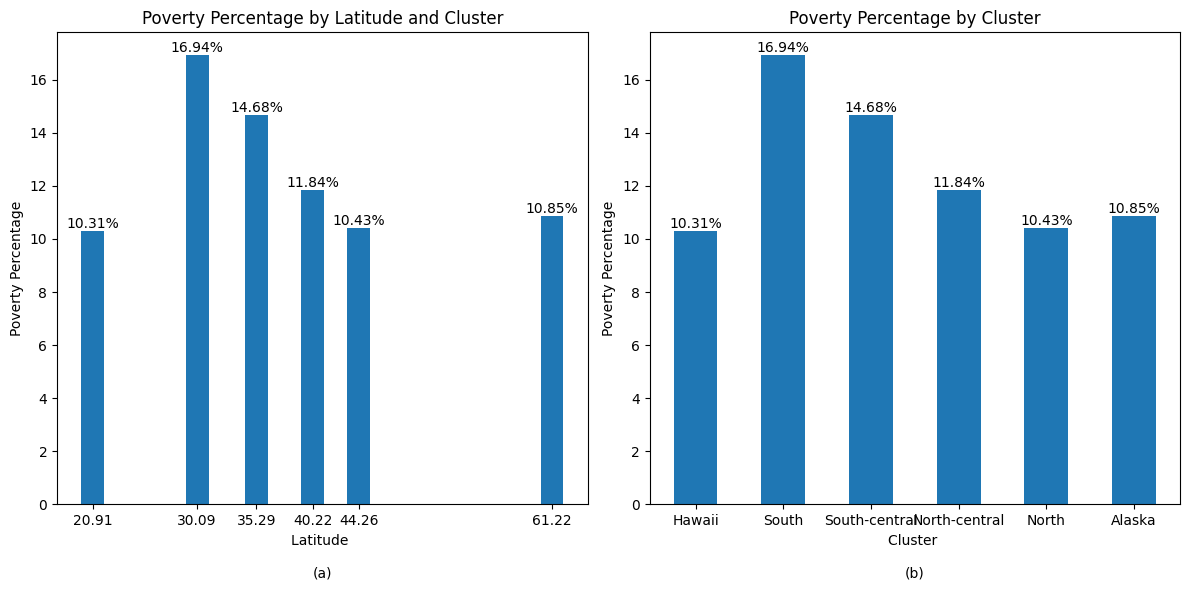

In [100]:
plt.figure(figsize=(12, 6))

#first subplot on the left
plt.subplot(1, 2, 1)
plt.bar(result['latitude'], result['povertyPercentage'], width=2)
plt.xlabel('Latitude \n\n(a)')
plt.ylabel('Poverty Percentage')
plt.title('Poverty Percentage by Latitude and Cluster')

#add values of povertyPercentage on the bars
for x, y in zip(result['latitude'], result['povertyPercentage']):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom')

plt.xticks(result['latitude'])

#second subplot on the right
plt.subplot(1, 2, 2)

#create a list of cluster labels
labels_cluster = [f'{cluster}' for cluster in result['cluster']]

#width and positions of bars
width_bars = 0.5
position_bars = range(len(labels_cluster))

plt.bar(position_bars, result['povertyPercentage'], width=width_bars)
plt.xlabel('Cluster \n\n(b)')
plt.ylabel('Poverty Percentage')
plt.title('Poverty Percentage by Cluster')

plt.xticks(position_bars, labels_cluster)
plt.xticks(rotation=0, fontsize=10)

#add values of povertyPercentage on the bars
for x, y in zip(position_bars, result['povertyPercentage']):
    plt.text(x, y, f'{y:.2f}%', ha='center', va='bottom')


plt.tight_layout()
plt.show()

# Geo Data Visualization

The idea would be to represent on a map of the U.S. and in a simple graphical way which cities and states are the most dangerous. For cities, the idea would be to use a clustering algorithm, using a metric that takes into account latitude and longitude. For states, on the other hand, just merge the data for each state, counting how many instances of each state appear.

## Data creation and cleaning.

At first we need to create the subtable that we are interested in and do some preliminary cleaning. In fact, at first we can eliminate all rows that do not have latitude and longitude information, since they cannot be represented graphically. 

In [101]:
geo_incidents=incidents[['state', 'city_or_county', 'latitude', 'longitude']]
geo_incidents=geo_incidents.dropna(subset=['latitude'])

#check that there are no null valus in dataframe
geo_incidents.isnull().sum()

state             0
city_or_county    0
latitude          0
longitude         0
dtype: int64

In addition, in the cleaning part we had already removed the 4 data points that represented outliers - in fact, through a graphic visualization, you could see how those points fell on Chinese soil. 

## Geo Visualization by cities

We then begin by wanting to give a graphical representation of the number of accidents that occur in each city. We first create a table in which we merge all the occurrences of incidents that happen in the same city and create a new column, called **number_of_incidents**, that counts for each city how many times it was present in the original dataframe - i.e., how many crimes occurred in that city. At this point we also update the **latitude** and **longitude** columns, taking for each city as its latitude - and likewise as its longitude - the median of all the latitudes associated with that specific city in the original dataframe. We take the median and not the mean because we would like a point that geographically reflects the center of the city.

In [102]:
# Calculate the incident count for each 'state' and 'city_or_county' pair.
city_state_incidents = geo_incidents.groupby(['city_or_county', 'state'])['latitude'].count().reset_index()

# Rename the 'latitude' column to 'number_of_incidents'
city_state_incidents.rename(columns={'latitude': 'number_of_incidents'}, inplace=True)


average_location = geo_incidents.groupby(['state', 'city_or_county'])[['latitude', 'longitude']].median().reset_index()

# Merge incident count and location information.
geo_cities_incidents = pd.merge(city_state_incidents, average_location, on=['state', 'city_or_county'])
geo_cities_incidents = geo_cities_incidents.sort_values(by='number_of_incidents', ascending=False)
geo_cities_incidents.head()


,city_or_county,state,number_of_incidents,latitude,longitude
2776,Chicago,Illinois,10416,41.83625,-87.6734
737,Baltimore,Maryland,3843,39.30270,-76.6286
16150,Washington,District of Columbia,3075,38.89350,-76.9902
10941,New Orleans,Louisiana,2953,29.96880,-90.0613
12158,Philadelphia,Pennsylvania,2857,39.99390,-75.1565


At this point we use the **plotly** package to give a graphical representation of the data in the table above. Each city will be associated with a circle. This circle will be larger as the **number_of_incidents** referring to the city that the circle describes increases. Likewise, the colors of these circles will vary from yellow, to indicate cities with low numbers of crimes, to red, to indicate cities with more crimes.

In [103]:
import plotly.express as px

color_scale = [(0, 'yellow'), (1,'red')]
fig = px.scatter_mapbox(geo_cities_incidents, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_data=[ "city_or_county", "state", "number_of_incidents"],
                        color="number_of_incidents",
                        color_continuous_scale=color_scale,
                        size="number_of_incidents",
                        zoom=3, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Cluster creation

We now move on to the creation of the clusters. To do this we use the **k-Means** method found in the **sklearn.cluster** library. In order to use this method first it would be useful to try to figure out what the optimal number of clusters is. The idea then to figure out what is the ideal number of clusters is to use a method, called the **Elbow Method**. This involves training the k-Means model with a range of cluster values and calculating the inertia - sum of the square distances of the instances from the cluster center, so SSE - for each cluster value. Once this is done, one then looks for the point at which the inertia begins to change most slowly, creating an elbow curve. This point is considered the optimal number of clusters. In general, we will want to create a number of clusters that gives us a signficant idea of how incidents develop in the United States, so neither include too many cities, nor too few. Therefore, the range of cluster values we apply to the method is from 10 to 100.

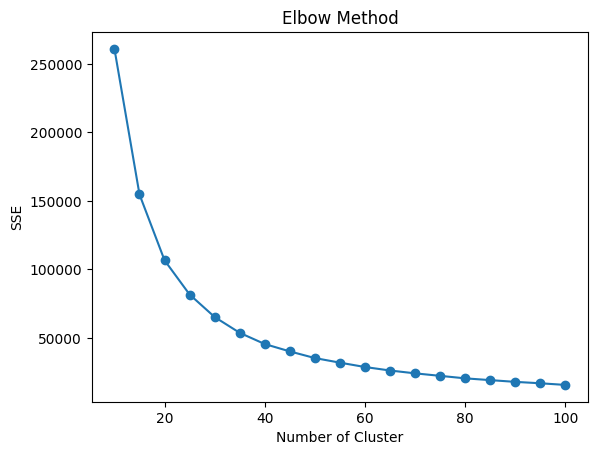

In [104]:
from sklearn.cluster import KMeans

# Select the column of latitude and longitude
coordinates = geo_cities_incidents[['latitude', 'longitude']]

inertias = []
k_values=range(10, 101, 5)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(coordinates)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('SSE')
plt.title("Elbow Method")
plt.show()

Once we have then identified the best number of clusters, which would be about 42, we can apply the k-Means method one last time and obtain a clustering of our cities. We thus add to the new tables a new column in which we add the information about what number of clusters each data item belongs to.

In [105]:
#the number of cluster obtained from elbow method
num_clusters = 42  
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
kmeans.fit(coordinates)

#add cluster labels to the original DataFrame
geo_cities_incidents['cluster'] = kmeans.labels_
geo_cities_incidents.head()


,city_or_county,state,number_of_incidents,latitude,longitude,cluster
2776,Chicago,Illinois,10416,41.83625,-87.6734,22
737,Baltimore,Maryland,3843,39.30270,-76.6286,0
16150,Washington,District of Columbia,3075,38.89350,-76.9902,0
10941,New Orleans,Louisiana,2953,29.96880,-90.0613,20
12158,Philadelphia,Pennsylvania,2857,39.99390,-75.1565,23


At this point we create a new dataframe from **geo_city_incidents** in which we simply group all the data belonging to the same cluster. For each cluster we set as *latitude* - and therefore as *longitude* - the median of all the "latitudes" in the data that belong to the cluster. Also as *number_of_incidents* the sum of all *number_of_incidents* present in the cities that belong to the cluster.

In [106]:
# Raggruppa il DataFrame originale 'df' per il numero di cluster
grouped = geo_cities_incidents.groupby('cluster')

# Calcola la somma di "number_of_incidents" per ciascun cluster
sum_incidents = grouped['number_of_incidents'].sum()

# Calcola la mediana di latitudine e longitudine per ciascun cluster
median_latitude = grouped['latitude'].median()
median_longitude = grouped['longitude'].median()

# Crea un nuovo DataFrame con le colonne richieste
new_geo_cities_incidents = pd.DataFrame({
    'cluster': sum_incidents.index,
    'number_of_incidents': sum_incidents.values,
    'latitude': median_latitude.values,
    'longitude': median_longitude.values
})

new_geo_cities_incidents

# Ora 'new_geo_cities_incidents' contiene il nuovo DataFrame con le colonne richieste

,cluster,number_of_incidents,latitude,longitude
0,0,13674,38.862800,-77.142950
1,1,1485,41.307750,-111.861750
2,2,4598,40.407500,-96.222500
3,3,122,61.518800,-160.949000
4,4,8804,34.635700,-84.899200
5,5,1116,41.055625,-123.320500
6,6,277,20.888250,-156.416500
7,7,8428,42.729950,-71.749800
8,8,2842,37.385550,-82.055650
9,9,8718,32.237500,-95.453300


Finally we can move on to printing the result obtained on the map of the United States, exactly as we had printed previously for the cities.

In [107]:
color_scale = [(0, 'yellow'), (1,'red')]
fig = px.scatter_mapbox(new_geo_cities_incidents, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_data=[ "cluster", "number_of_incidents"],
                        color="number_of_incidents",
                        color_continuous_scale=color_scale,
                        size="number_of_incidents",
                        zoom=3, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Geo Visualization by states.

Now we move to visualize the incidents refferred to states. We have already seen previously, in data cleaning, that the number of states is exact.

At this point so we create a table containing only 51 rows. In fact, we will take the previously created **geo_cities_incidents** DataFrame and merge all rows that report information about crimes that occurred in the same state. We also update the *number_of_incidents* column, which counts the sum of the number of crimes that occurred in all cities for each state.

Finally, we associate these two columns with two other columns containing *latitude* and *longitude* information. With each state we associate as latitude - and equivalently longitude - the median of all latitudes in **geo_cities_incidents** that relate to the same state. We take the median and not the mean because we want to get a point that is geographically in the center of the state, thus not having to count if more crimes occur at one point in the same state than at another point.

In [108]:
state_incidents = geo_cities_incidents.groupby('state')['number_of_incidents'].sum().reset_index()
state_incidents.columns = ['state', 'number_of_incidents']
average_location_state = geo_cities_incidents.groupby('state')[['latitude', 'longitude']].median().reset_index()
geo_state_incidents=pd.merge(state_incidents, average_location_state, on='state')
geo_state_incidents


,state,number_of_incidents,latitude,longitude
0,Alabama,5372,33.225900,-86.680600
1,Alaska,1289,61.542200,-151.201000
2,Arizona,2264,33.507600,-111.789000
3,Arkansas,2754,35.263800,-92.399100
4,California,16005,36.322125,-119.789500
5,Colorado,3055,39.441325,-105.101500
6,Connecticut,2987,41.574950,-72.678150
7,Delaware,1643,39.178825,-75.575550
8,District of Columbia,3081,38.866350,-76.999650
9,Florida,14597,28.306800,-81.719400


Finally we use **plotly** in the same way we did above in the case of cities to get the following result.

In [109]:
color_scale = [(0, 'yellow'), (1,'red')]
fig = px.scatter_mapbox(geo_state_incidents, 
                        lat="latitude", 
                        lon="longitude", 
                        hover_data=[ "state", "number_of_incidents"],
                        color="number_of_incidents",
                        color_continuous_scale=color_scale,
                        size="number_of_incidents",
                        zoom=3, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()